## &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Team05 : Laptop Price Analysis

1. Ek Vong Panharith
2. Chou Vandy
3. Chea Rotha
4. Chorn Seyhak
5. Hak Kimhong

In [819]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [820]:
df = pd.read_csv('LaptopDataMerge.csv', encoding='utf-8')
df

,ProductName,Brand,Price,Processor,RAM,VGA,Storage,Display
0,HP Elitebook 840 G3,HP,$359,Intel Core i7,8GB,2GB & Under,250GB - 256GB,"14"" - 14.9"""
1,𝐌𝐒𝐈 Thin GF63 11SC,MSI,$729,Intel Core i7,16GB,4GB,500GB - 512GB,"15"" - 15.9"""
2,𝐃𝐄𝐋𝐋 𝐆𝟓 𝟓𝟓𝟎𝟓 𝐆𝐚𝐦𝐢𝐧𝐠,Dell,$799,AMD Ryzen 7,16GB,6GB,500GB - 512GB,"15"" - 15.9"""
3,Hp ProBook 430 G3 98% ជាពិសេសមានHard disk 2គ្រ...,HP,$245,Intel Core i5,8GB,2GB & Under,128GB & Under,"15"" - 15.9"""
4,Lenovo Think Pad E570C,Lenovo,$270,Intel Core i3,4GB,2GB & Under,128GB & Under,"15"" - 15.9"""
...,...,...,...,...,...,...,...,...
13825,Acer swift SF314 (Used-99%) Grad A+ កម្លាំងម៉ា...,Acer,$635,Intel Core i7,16GB,8GB,1TB,"14"" - 14.9"""
13826,Dell XPS 13 9350(Used-98%)តូចស្តេីងស្អាតបងៗ😍🎉💥,Dell,$435,Intel Core i5,4GB,2GB & Under,500GB - 512GB,"13"" - 13.9"""
13827,Acer aspire A515 (Used-98%)🔥ស្តេីងស្អាត​ សេរីឆ...,Acer,$465,Intel Core i5,8GB,4GB,250GB - 256GB,"15"" - 15.9"""
13828,"macbook pro 15"" retina 2015 (i7 / ram 16 ssd 1...",Apple,$550,Intel Core i7,16GB,Integrated,1TB,"15"" - 15.9"""


### Initial observations:
We observe that there are different types of variables (columns). Variables which contain records that encompases numbers, letters, or both numerals and letters (alphanumerics). There are columns which contain special characters (i.e., /,.,?,×,"). We will be treating such records (observations) while dealing with Data Preprocessing in order to reach clear insights of our dataset.

# 1 . Data Preparation

### Modify values in column 'RAM'

In [821]:
df['En_RAM'] = df['RAM'].apply(lambda x: str(x).replace("& Under",""))
df['En_RAM'] = df['En_RAM'].apply(lambda x: str(x).replace("& Larger",""))
df['En_RAM'] = df['En_RAM'].apply(lambda x: str(x).replace("GB",""))
df['En_RAM'] = df['En_RAM'].apply(pd.to_numeric)
df['En_RAM'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13830 entries, 0 to 13829
Series name: En_RAM
Non-Null Count  Dtype
--------------  -----
13830 non-null  int64
dtypes: int64(1)
memory usage: 108.2 KB


### Modify values in column 'Price'

In [822]:
df['Price'] = df['Price'].replace({r'\$' : ''}, regex = True)
df['Price'] = df['Price'].replace({r'\,' : ''}, regex = True)
df['Price'] = df['Price'].astype('float64')
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13830 entries, 0 to 13829
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
13830 non-null  float64
dtypes: float64(1)
memory usage: 108.2 KB


### Modify values in column "Storage"

In [823]:
df['En_Storage']= df['Storage'].astype(str).replace('\.0', '', regex = True)
df['En_Storage']= df['En_Storage'].str.replace('GB', '')
df['En_Storage'] = df['En_Storage'].str.replace('TB', '000')
df['En_Storage']= df['En_Storage'].str.replace('& Under', '')
df['En_Storage']= df['En_Storage'].str.replace('& Larger', '')
df['En_Storage'].value_counts()
storage = df['En_Storage'].str.split("-", n = 1, expand = True)
df['En_Storage'] = storage[0]
df['En_Storage'] = df['En_Storage'].astype('int64')
df['En_Storage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13830 entries, 0 to 13829
Series name: En_Storage
Non-Null Count  Dtype
--------------  -----
13830 non-null  int64
dtypes: int64(1)
memory usage: 108.2 KB


### Modify values in column "Display"

In [824]:
df['En_Display'] = df['Display'].astype(str).replace('\.0', '', regex = True)
df["En_Display"] = df["En_Display"].str.split('"').str[0]
df['En_Display'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13830 entries, 0 to 13829
Series name: En_Display
Non-Null Count  Dtype 
--------------  ----- 
13830 non-null  object
dtypes: object(1)
memory usage: 108.2+ KB


### Modify values in column "Processor"

In [825]:
df = df.drop(df[df['Processor'] == 'AMD Ryzen'].index)

In [826]:
def fetch_procesor(text):
    if text == 'Intel Core i5':
        return 6
    elif text == 'Intel Core 2':
        return 2
    elif text == 'Intel Core i7':
        return 8
    elif text == 'Intel Core i3':
        return 4
    elif text == 'Intel Celeron':
        return 2
    elif text == 'Intel Core i9':
        return 14
    elif text == 'Intel Pentium':
        return 2
    elif text == 'M1':
        return 8
    elif text == 'M1 Pro':
        return 10
    elif text == 'M1 Max':
        return 10
    elif text == 'M1 Ultra':
        return 20
    elif text == 'M2':
        return 8
    elif text == 'M2 Pro':
        return 10
    elif text == 'AMD Ryzen 3':
        return 4
    elif text == 'AMD Ryzen 5':
        return 6
    elif text == 'AMD Ryzen 7':
        return 8
    elif text == 'AMD Ryzen 9':
        return 12
    elif text == 'Intel Xeon':
        return 12
    
df['En_Processor'] = df['Processor'].apply(fetch_procesor)

### Check values of Proccessor in the dataset

In [827]:
df['Processor'].value_counts()

Intel Core i5    5921
Intel Core i7    3870
Intel Core i3    1264
Intel Celeron    1002
AMD Ryzen 7       392
Other             258
Intel Core i9     237
M1                211
AMD Ryzen 5       163
M2                156
Intel Core 2      114
M1 Pro             69
M1 Max             58
Intel Pentium      56
AMD Ryzen 3        21
AMD Ryzen 9        14
M1 Ultra            5
M2 Pro              4
Intel Xeon          1
Name: Processor, dtype: int64

### Check values of VGA in the dataset

In [828]:
df['VGA'].value_counts()

Integrated       5717
2GB & Under      3201
4GB              3197
16GB & Larger     705
8GB               561
6GB               394
12GB               41
Name: VGA, dtype: int64

### Check values of Display in the dataset

In [829]:
df['Display'].value_counts()

15" - 15.9"      4789
14" - 14.9"      4335
13" - 13.9"      2478
12" - 12.9"      1319
16" - 16.9"       385
17" & Larger      325
11" - 11.9"       121
10.9" & Under      64
Name: Display, dtype: int64

In [830]:
df.to_csv('ModifiedData.csv', index = True)

In [831]:
df = pd.read_csv('ModifiedData.csv')
df

,Unnamed: 0,ProductName,Brand,Price,Processor,RAM,VGA,Storage,Display,En_RAM,En_Storage,En_Display,En_Processor
0,0,HP Elitebook 840 G3,HP,359.0,Intel Core i7,8GB,2GB & Under,250GB - 256GB,"14"" - 14.9""",8,250,14.0,8.0
1,1,𝐌𝐒𝐈 Thin GF63 11SC,MSI,729.0,Intel Core i7,16GB,4GB,500GB - 512GB,"15"" - 15.9""",16,500,15.0,8.0
2,2,𝐃𝐄𝐋𝐋 𝐆𝟓 𝟓𝟓𝟎𝟓 𝐆𝐚𝐦𝐢𝐧𝐠,Dell,799.0,AMD Ryzen 7,16GB,6GB,500GB - 512GB,"15"" - 15.9""",16,500,15.0,8.0
3,3,Hp ProBook 430 G3 98% ជាពិសេសមានHard disk 2គ្រ...,HP,245.0,Intel Core i5,8GB,2GB & Under,128GB & Under,"15"" - 15.9""",8,128,15.0,6.0
4,4,Lenovo Think Pad E570C,Lenovo,270.0,Intel Core i3,4GB,2GB & Under,128GB & Under,"15"" - 15.9""",4,128,15.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13811,13825,Acer swift SF314 (Used-99%) Grad A+ កម្លាំងម៉ា...,Acer,635.0,Intel Core i7,16GB,8GB,1TB,"14"" - 14.9""",16,1000,14.0,8.0
13812,13826,Dell XPS 13 9350(Used-98%)តូចស្តេីងស្អាតបងៗ😍🎉💥,Dell,435.0,Intel Core i5,4GB,2GB & Under,500GB - 512GB,"13"" - 13.9""",4,500,13.0,6.0
13813,13827,Acer aspire A515 (Used-98%)🔥ស្តេីងស្អាត​ សេរីឆ...,Acer,465.0,Intel Core i5,8GB,4GB,250GB - 256GB,"15"" - 15.9""",8,250,15.0,6.0
13814,13828,"macbook pro 15"" retina 2015 (i7 / ram 16 ssd 1...",Apple,550.0,Intel Core i7,16GB,Integrated,1TB,"15"" - 15.9""",16,1000,15.0,8.0


# Understanding the data

### Drop unwanted column

In [832]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [833]:
df.shape

(13816, 12)

In [834]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13816 entries, 0 to 13815
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   13816 non-null  object 
 1   Brand         13816 non-null  object 
 2   Price         13816 non-null  float64
 3   Processor     13816 non-null  object 
 4   RAM           13816 non-null  object 
 5   VGA           13816 non-null  object 
 6   Storage       13816 non-null  object 
 7   Display       13816 non-null  object 
 8   En_RAM        13816 non-null  int64  
 9   En_Storage    13816 non-null  int64  
 10  En_Display    13816 non-null  float64
 11  En_Processor  13558 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.3+ MB


In [835]:
df.columns

Index(['ProductName', 'Brand', 'Price', 'Processor', 'RAM', 'VGA', 'Storage',
       'Display', 'En_RAM', 'En_Storage', 'En_Display', 'En_Processor'],
      dtype='object')

In [836]:
df.nunique()

ProductName     893
Brand            17
Price           325
Processor        19
RAM              10
VGA               7
Storage           5
Display           8
En_RAM           10
En_Storage        5
En_Display        8
En_Processor      8
dtype: int64

In [837]:
df.describe(include = ['float64', 'int64'])

,Price,En_RAM,En_Storage,En_Display,En_Processor
count,13816.000000,13816.000000,13816.000000,13816.000000,13558.000000
mean,505.818063,10.078098,389.610162,14.062001,6.337808
std,432.280947,7.787165,290.211798,1.162165,2.097513
min,1.000000,2.000000,128.000000,10.900000,2.000000
25%,249.000000,8.000000,250.000000,13.000000,6.000000
50%,365.000000,8.000000,250.000000,14.000000,6.000000
75%,635.000000,16.000000,500.000000,15.000000,8.000000
max,3050.000000,64.000000,2000.000000,17.000000,20.000000


In [838]:
df.describe(include = 'object')

,ProductName,Brand,Processor,RAM,VGA,Storage,Display
count,13816,13816,13816,13816,13816,13816,13816
unique,893,17,19,10,7,5,8
top,MacBook Pro 15.4” inch Late 2018 Touch Bar 99%,Dell,Intel Core i5,8GB,Integrated,250GB - 256GB,"15"" - 15.9"""
freq,93,3348,5921,6911,5717,5489,4789


## Check for percentages of missing values inside each feature.

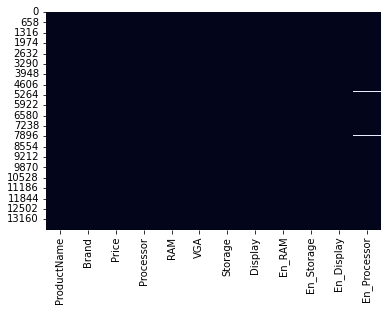

In [839]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [840]:
data_with_nan = [feature for feature in df.columns if df[feature].isnull().sum]

for feature in data_with_nan:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values.')

ProductName 0.0 % missing values.
Brand 0.0 % missing values.
Price 0.0 % missing values.
Processor 0.0 % missing values.
RAM 0.0 % missing values.
VGA 0.0 % missing values.
Storage 0.0 % missing values.
Display 0.0 % missing values.
En_RAM 0.0 % missing values.
En_Storage 0.0 % missing values.
En_Display 0.0 % missing values.
En_Processor 0.0187 % missing values.


### Checking Duplicate Values

In [841]:
for feature in df.columns:
    print("The number of duplicate values of {} is: {}".format(feature, df[feature].duplicated().sum()))

The number of duplicate values of ProductName is: 12923
The number of duplicate values of Brand is: 13799
The number of duplicate values of Price is: 13491
The number of duplicate values of Processor is: 13797
The number of duplicate values of RAM is: 13806
The number of duplicate values of VGA is: 13809
The number of duplicate values of Storage is: 13811
The number of duplicate values of Display is: 13808
The number of duplicate values of En_RAM is: 13806
The number of duplicate values of En_Storage is: 13811
The number of duplicate values of En_Display is: 13808
The number of duplicate values of En_Processor is: 13807


### Insights

▪ This show that there are some missing values in one of our column in our dataset. Therefore our dataset is cleaned, because we replace them with its mean value.

▪ There are a tons of duplicated values in our dataset. Therefore it can be explained that some specs of our laptops might be the same.

### Drop missing value

In [842]:
df = df.dropna()

### Recheck missing values

In [843]:
data_with_nan = [feature for feature in df.columns if df[feature].isnull().sum]

for feature in data_with_nan:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values.')

ProductName 0.0 % missing values.
Brand 0.0 % missing values.
Price 0.0 % missing values.
Processor 0.0 % missing values.
RAM 0.0 % missing values.
VGA 0.0 % missing values.
Storage 0.0 % missing values.
Display 0.0 % missing values.
En_RAM 0.0 % missing values.
En_Storage 0.0 % missing values.
En_Display 0.0 % missing values.
En_Processor 0.0 % missing values.


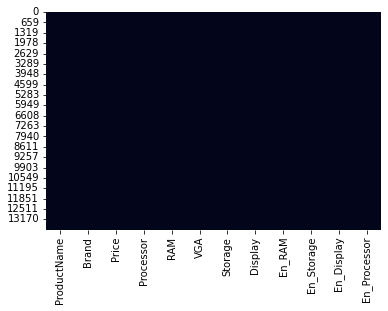

In [844]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

## Checking for outliers

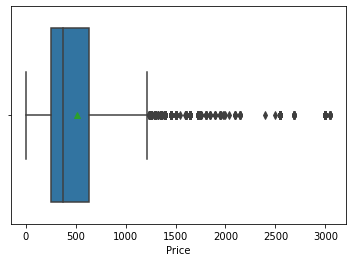

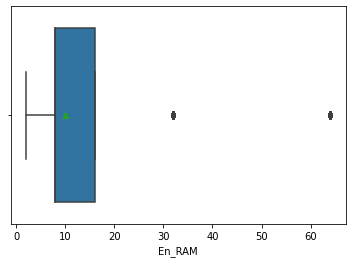

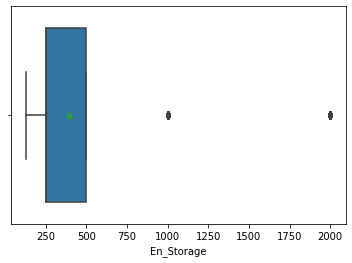

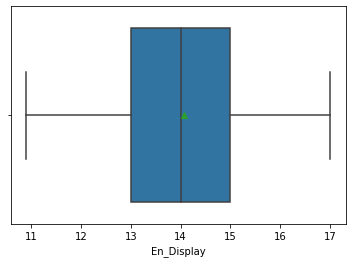

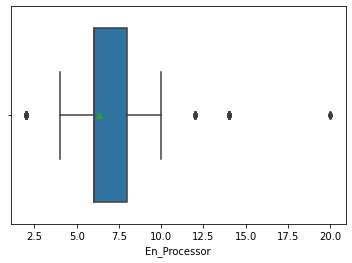

In [845]:
def plot_boxplot(data, feature):
    sns.boxplot(x = data[feature], showmeans = True, data = df)
    plt.show()

for feature in df.select_dtypes(include = ['float64', 'int64']):
    plot_boxplot(df, feature)

In [846]:
def detect_outlier(data_set):
    outlier_lst = []
    q1 = data_set.quantile(0.25)
    q3 = data_set.quantile(0.75)
    
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    upper_outliers_index = data_set[data_set > upper_bound].index.tolist()
    lower_outliers_index = data_set[data_set < lower_bound].index.tolist()
    
    print(f'Upper outlier index: ', upper_outliers_index) \
    if upper_outliers_index else print(f'Upper outlier index:', None)
    
    print(f'Lower outlier index: ', lower_outliers_index) \
    if lower_outliers_index else print(f'lower outlier index:', None)

In [847]:
detect_outlier(df['Price'])

Upper outlier index:  [34, 83, 133, 182, 236, 285, 334, 385, 434, 484, 533, 582, 631, 680, 729, 778, 827, 875, 924, 973, 997, 1022, 1046, 1071, 1095, 1120, 1144, 1169, 1193, 1218, 1242, 1267, 1291, 1297, 1316, 1340, 1346, 1365, 1389, 1395, 1414, 1438, 1444, 1463, 1487, 1493, 1512, 1536, 1542, 1561, 1585, 1591, 1611, 1635, 1641, 1660, 1684, 1690, 1709, 1733, 1739, 1758, 1782, 1788, 1807, 1831, 1837, 1856, 1880, 1886, 1905, 1929, 1935, 1954, 1978, 1984, 2003, 2027, 2033, 2052, 2076, 2082, 2101, 2125, 2131, 2150, 2174, 2180, 2199, 2223, 2229, 2248, 2272, 2278, 2298, 2322, 2328, 2371, 2377, 2420, 2426, 2469, 2475, 2518, 2524, 2567, 2573, 2616, 2622, 2665, 2671, 2714, 2720, 2762, 2768, 2811, 2817, 2860, 2866, 2909, 2915, 2964, 2970, 3013, 3019, 3062, 3068, 3110, 3116, 3159, 3165, 3208, 3214, 3257, 3263, 3306, 3312, 3355, 3361, 3404, 3410, 3454, 3460, 3503, 3509, 3553, 3559, 3602, 3608, 3655, 3661, 3705, 3711, 3758, 3764, 3810, 3816, 3859, 3865, 3908, 3914, 3958, 3964, 4017, 4023, 4066, 4072

In [848]:
detect_outlier(df['En_Storage'])

Upper outlier index:  [39, 88, 138, 187, 241, 290, 339, 390, 439, 489, 538, 587, 636, 685, 734, 783, 832, 880, 929, 978, 997, 1027, 1046, 1076, 1095, 1125, 1144, 1174, 1193, 1223, 1242, 1247, 1272, 1291, 1296, 1297, 1321, 1340, 1345, 1346, 1370, 1389, 1394, 1395, 1419, 1438, 1443, 1444, 1468, 1487, 1492, 1493, 1517, 1536, 1541, 1542, 1566, 1585, 1590, 1591, 1616, 1635, 1640, 1641, 1665, 1684, 1689, 1690, 1714, 1733, 1738, 1739, 1763, 1782, 1787, 1788, 1812, 1831, 1836, 1837, 1861, 1880, 1885, 1886, 1910, 1929, 1934, 1935, 1947, 1959, 1978, 1983, 1984, 1996, 2008, 2027, 2032, 2033, 2045, 2057, 2076, 2081, 2082, 2094, 2106, 2125, 2130, 2131, 2143, 2155, 2174, 2179, 2180, 2192, 2204, 2223, 2228, 2229, 2241, 2253, 2272, 2277, 2278, 2290, 2303, 2322, 2327, 2328, 2340, 2352, 2371, 2376, 2377, 2389, 2401, 2420, 2425, 2426, 2438, 2450, 2469, 2474, 2475, 2487, 2499, 2518, 2523, 2524, 2536, 2548, 2567, 2572, 2573, 2585, 2616, 2621, 2622, 2634, 2665, 2670, 2671, 2683, 2714, 2719, 2720, 2732, 2762

### Insights

There are some outliers in our dataset. 

• Those outliers are legitimate observations **(True outliers)**. Example there might be one observation is bigger than other observations.

• There are only a small potion of outliers existed in our data. If we keep them, they will not affect our performance that much. 

## Removing outliers by Price is larger than $2000

In [849]:
df = df.drop(df[df["Price"] > 2000].index)

In [850]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13362 entries, 0 to 13815
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   13362 non-null  object 
 1   Brand         13362 non-null  object 
 2   Price         13362 non-null  float64
 3   Processor     13362 non-null  object 
 4   RAM           13362 non-null  object 
 5   VGA           13362 non-null  object 
 6   Storage       13362 non-null  object 
 7   Display       13362 non-null  object 
 8   En_RAM        13362 non-null  int64  
 9   En_Storage    13362 non-null  int64  
 10  En_Display    13362 non-null  float64
 11  En_Processor  13362 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1.3+ MB


# 2 . Data Exploration

### Pie Charts

Let's have a look on the ratio of brand names :


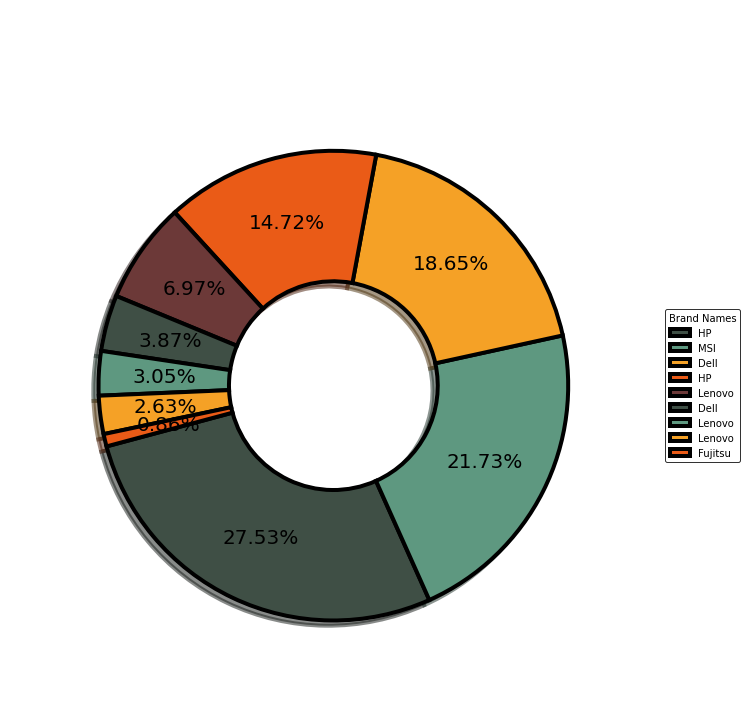

In [851]:
print(f"Let's have a look on the ratio of brand names :")
plt.subplots(figsize=(12, 12))
size = 0.5
wedges, texts, autotexts = plt.pie([df["Brand"].value_counts().values[0],
                                    df["Brand"].value_counts().values[1],
                                    df["Brand"].value_counts().values[2],
                                    df["Brand"].value_counts().values[3],
                                    df["Brand"].value_counts().values[5],
                                    df["Brand"].value_counts().values[6],
                                    df["Brand"].value_counts().values[7],
                                    df["Brand"].value_counts().values[8],
                                    df["Brand"].value_counts().values[9],
                                   ],
                                    explode = (0,0,0,0,0,0,0,0,0),
                                    textprops=dict(size= 20, color= "black"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 4),
                                    startangle = -165)

plt.legend(wedges, labels = df['Brand'], title="Brand Names", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nBrand Names Ratio", fontsize=25 , color = 'white')
plt.show() 

## Explaination

<h4> But keep in mind that for features with many categories, it's not recommended to use pie chart, because it can be hard to distringuish the small differences of the proportions by just eye balling. So we will use other visualization techniques such as histograms, box plots, or density plots for continuous vairables and bar charts for categorical variables. </h4>

### Distribution Plot

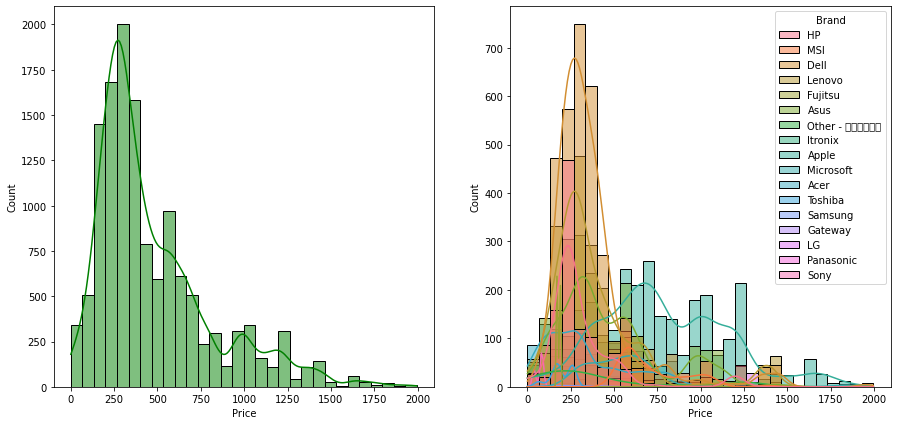

In [852]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))


plt.subplot(121)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g')

plt.subplot(122)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g', hue= 'Brand')
plt.show()

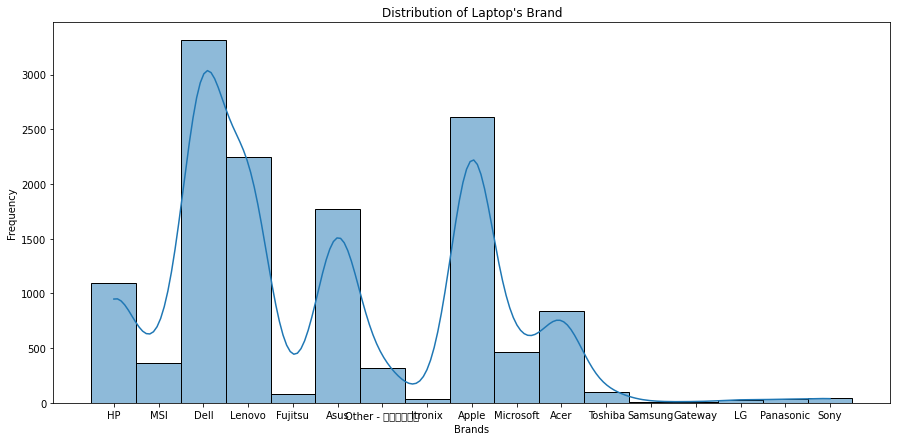

In [853]:
plt.figure(figsize=(15, 7))
sns.histplot(x = 'Brand', data = df, bins = 120, kde = True)
plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.title("Distribution of Laptop's Brand")
plt.show()

## Explaination: 

• From the above distribution plot of Price data is likely to be positively skewed. This is because there are a few laptops are quite expesive from the rest of laptops, which will cause the tail of the histogram to extend to the right. 

• A positive skewed histogram can also be caused by a non-normal distribution. A non-normal distribution is a distribution that is not symmetrical.





## Performing bivariate analysis

### Bar Charts

Let's have a look at the different brands:


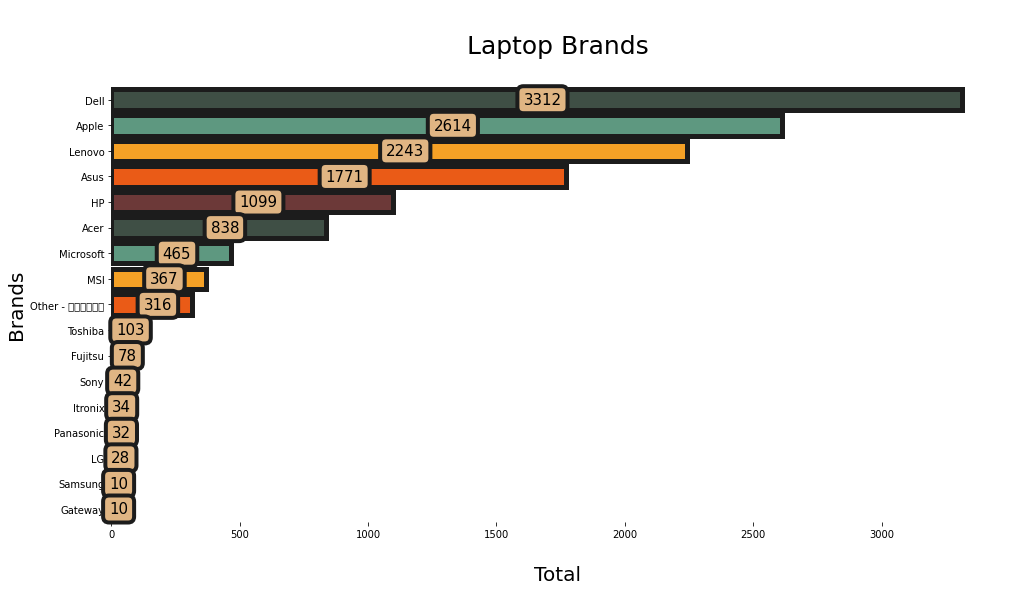

In [854]:
print("Let's have a look at the different brands:")
plt.subplots(figsize = (16, 8))
p=sns.countplot(y = df["Brand"],order = df["Brand"].value_counts().index, palette=["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_title("\nLaptop Brands\n", fontsize=25)
p.axes.set_ylabel("Brands", fontsize=20)
p.axes.set_xlabel("\nTotal", fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

## Explaination

<h4> When we looking at the trend of our data, we can see that Dell is the dominance brand following by Apple, Lenowo and so on. Brand Gateway is a least brand sold on the Khmer24.</h4>

Let's have a look at the different rams:


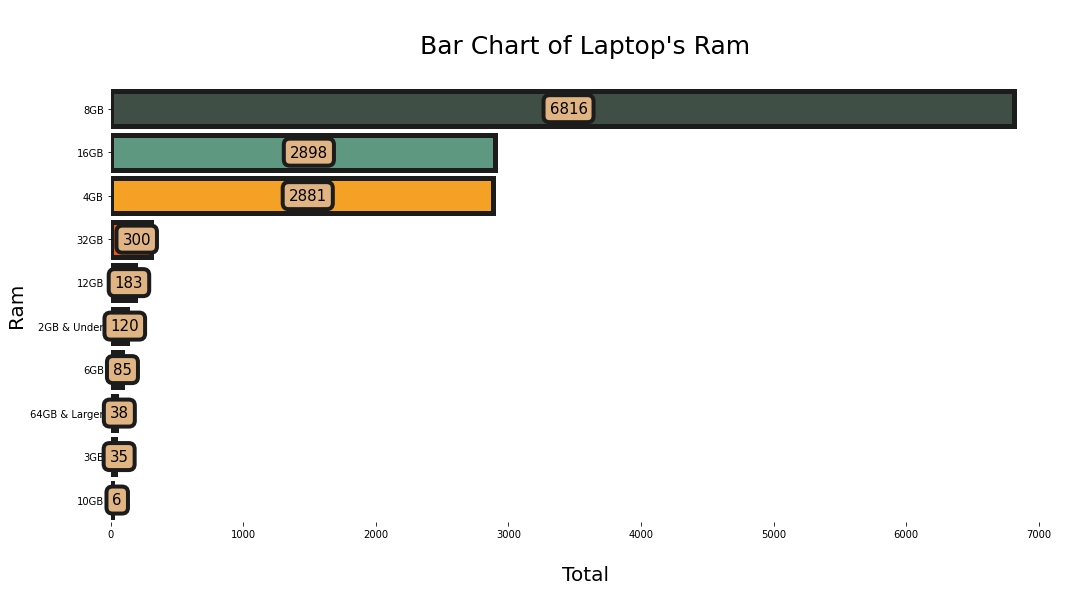

In [855]:
print("Let's have a look at the different rams:")
plt.subplots(figsize = (17, 8))
p=sns.countplot(y = df["RAM"],order = df["RAM"].value_counts().index, palette=["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_title("\nBar Chart of Laptop's Ram\n", fontsize=25)
p.axes.set_ylabel("Ram", fontsize = 20)
p.axes.set_xlabel("\nTotal", fontsize = 20)
p.axes.set_yticklabels(p.get_yticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look at the different processors:


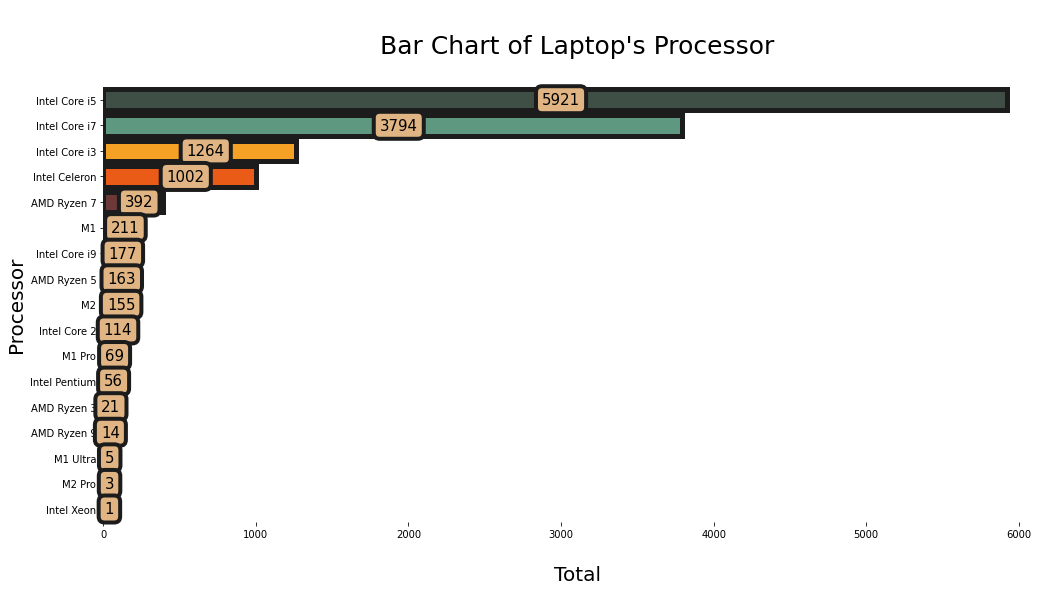

In [856]:
print("Let's have a look at the different processors:")
plt.subplots(figsize = (17, 8))
p=sns.countplot(y = df["Processor"],order = df["Processor"].value_counts().index, palette=["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_title("\nBar Chart of Laptop's Processor\n", fontsize=25)
p.axes.set_ylabel("Processor", fontsize = 20)
p.axes.set_xlabel("\nTotal", fontsize = 20)
p.axes.set_yticklabels(p.get_yticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

Let's have a look at the different VGAs:


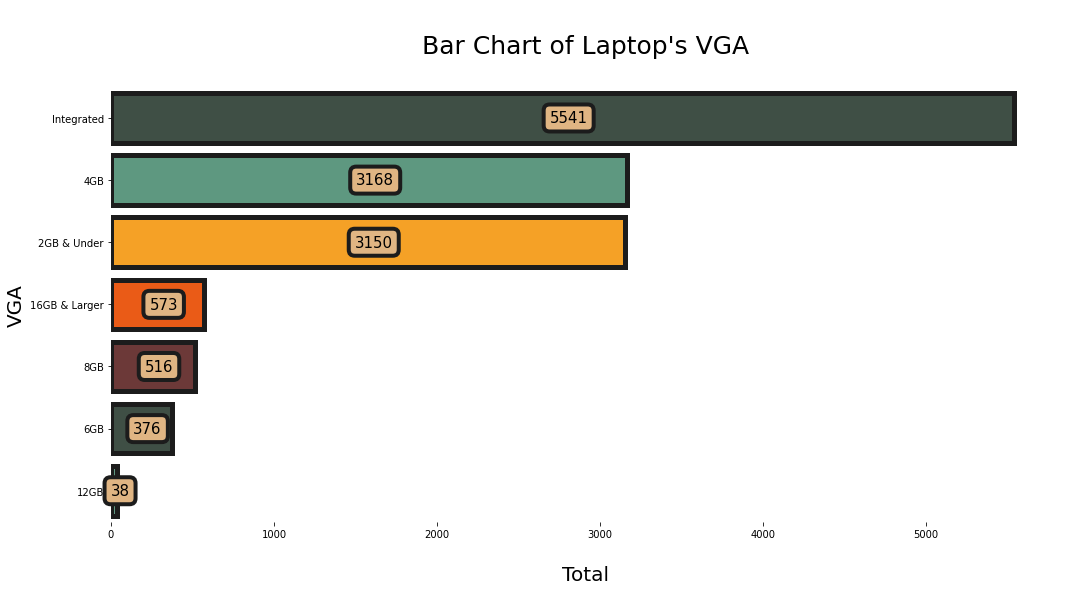

In [857]:
print("Let's have a look at the different VGAs:")
plt.subplots(figsize = (17, 8))
p=sns.countplot(y = df["VGA"],order = df["VGA"].value_counts().index, palette=["#3f4f45","#5e9880","#f5a126","#ea5b17","#6c3938"], saturation=1, edgecolor = "#1c1c1c", linewidth = 5)
p.axes.set_title("\nBar Chart of Laptop's VGA\n", fontsize=25)
p.axes.set_ylabel("VGA", fontsize = 20)
p.axes.set_xlabel("\nTotal", fontsize = 20)
p.axes.set_yticklabels(p.get_yticklabels(), rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=15,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "#e0b583", "edgecolor": "#1c1c1c", "linewidth" : 4, "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

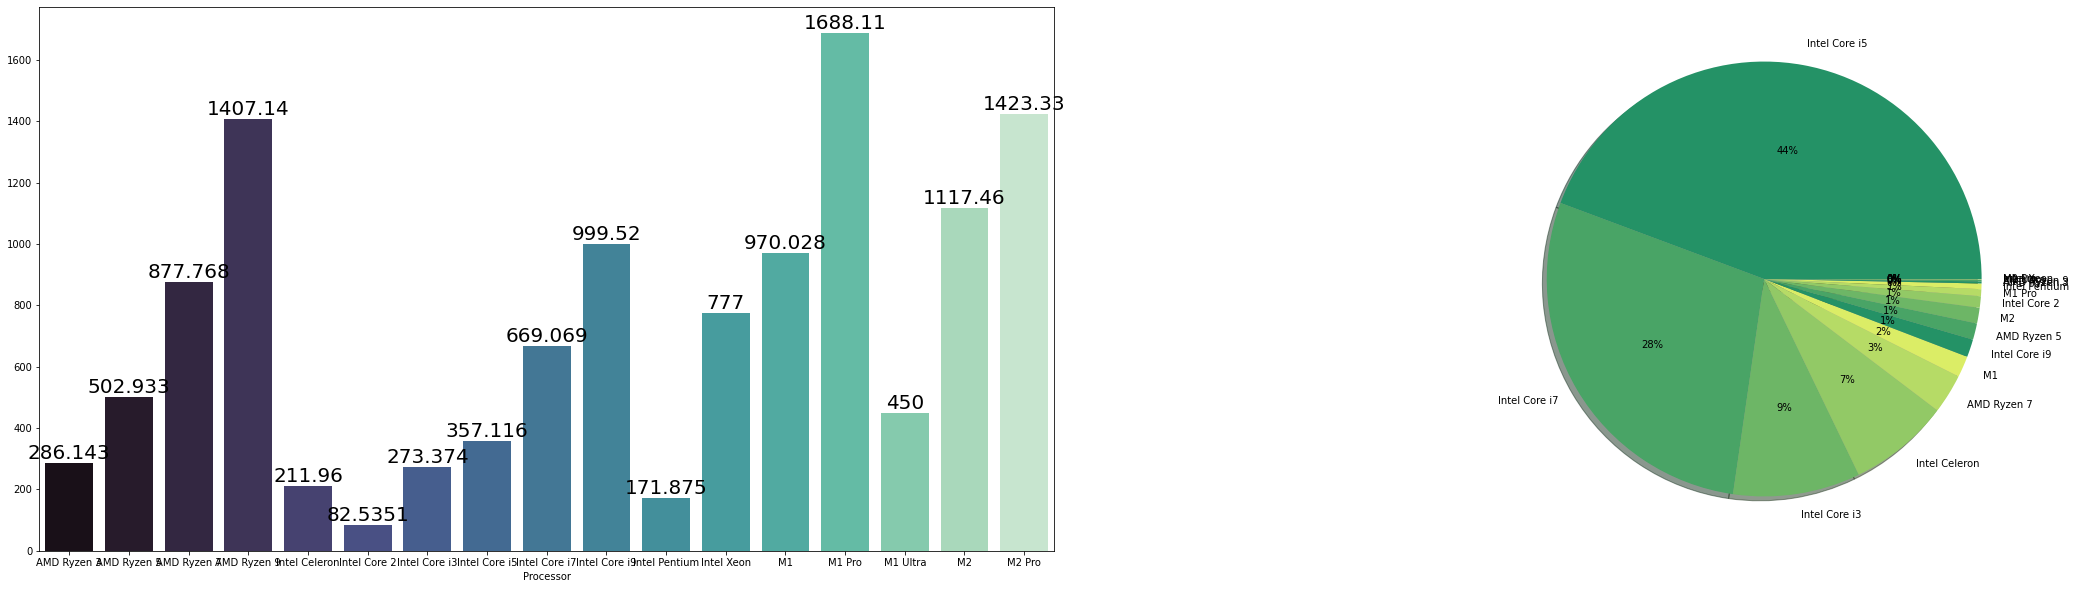

In [858]:
f,ax=plt.subplots(1, 2, figsize = (40, 10))

Group_data = df.groupby('Processor')
sns.barplot(x = Group_data ['Price'].mean().index, y = Group_data['Price'].mean().values, ax= ax[0],  palette = 'mako')
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
palette_color = sns.color_palette('summer')
plt.pie(x = df['Processor'].value_counts(), labels=df['Processor'].value_counts().index, autopct='%.0f%%', shadow=True, colors = palette_color)
plt.show() 

## Explaination: 

<h4> The graph above shows the trend of processors by their avarage Price. On the right show that Intel Processor is the most popular processor of laptops that sold in Khmer24 website. </h4>

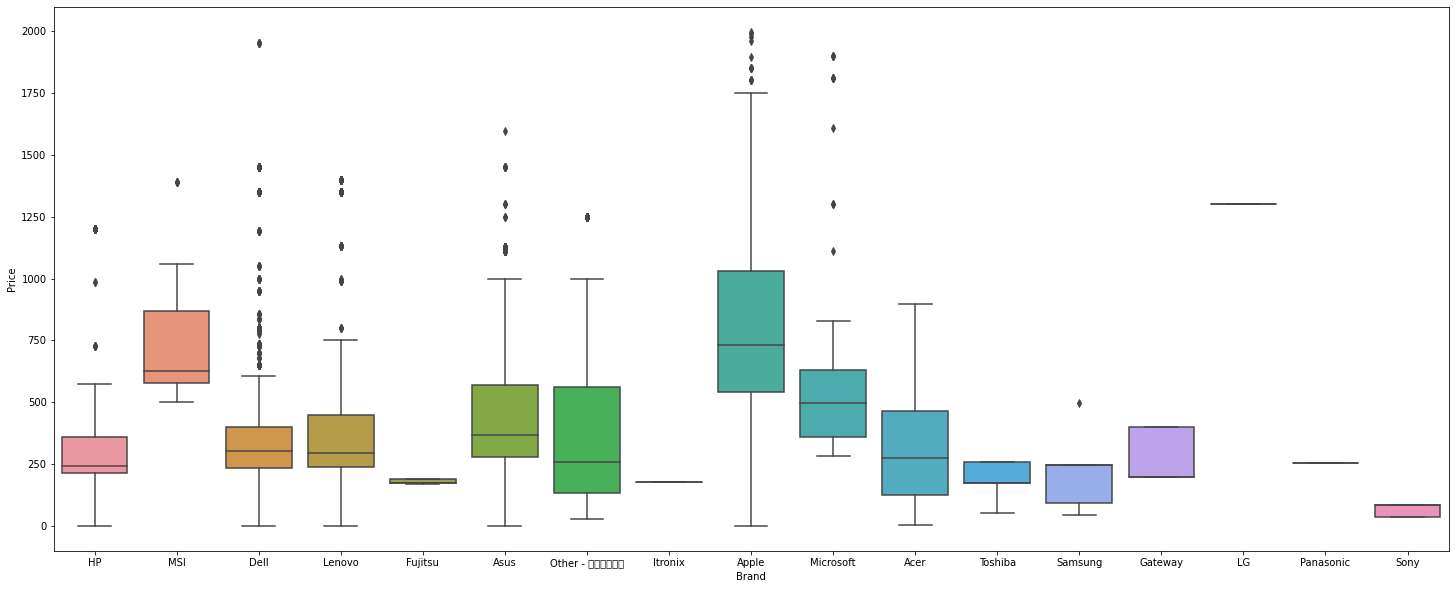

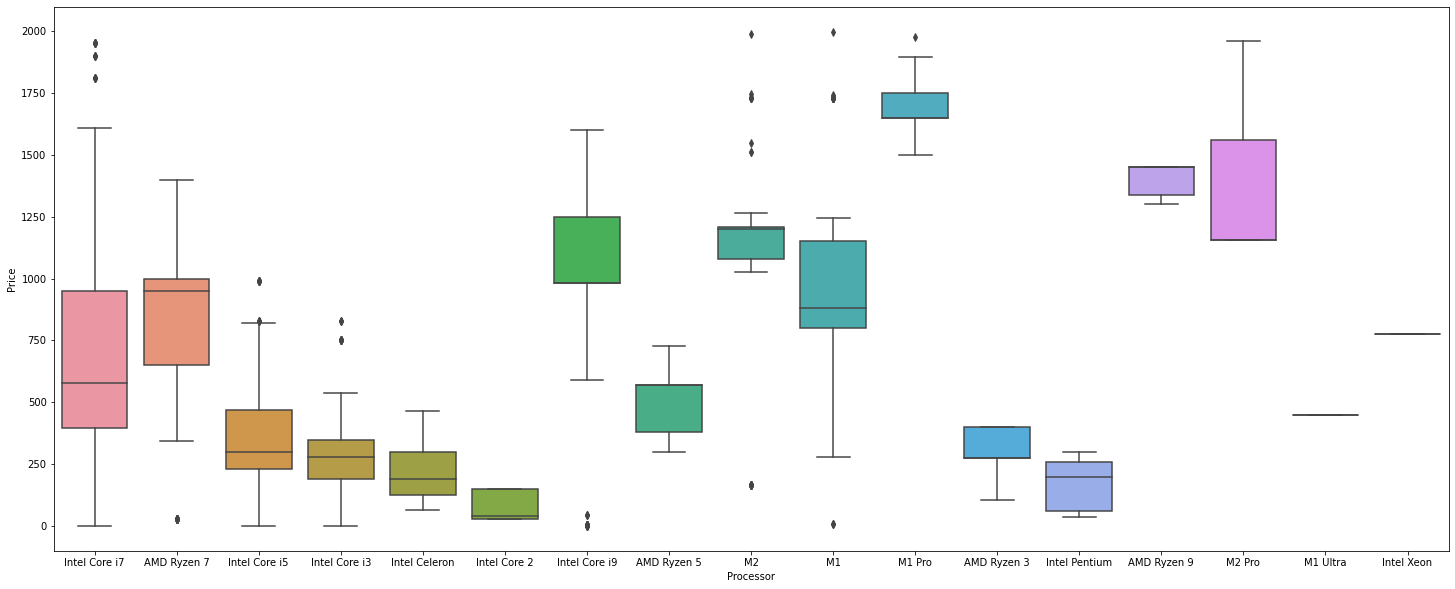

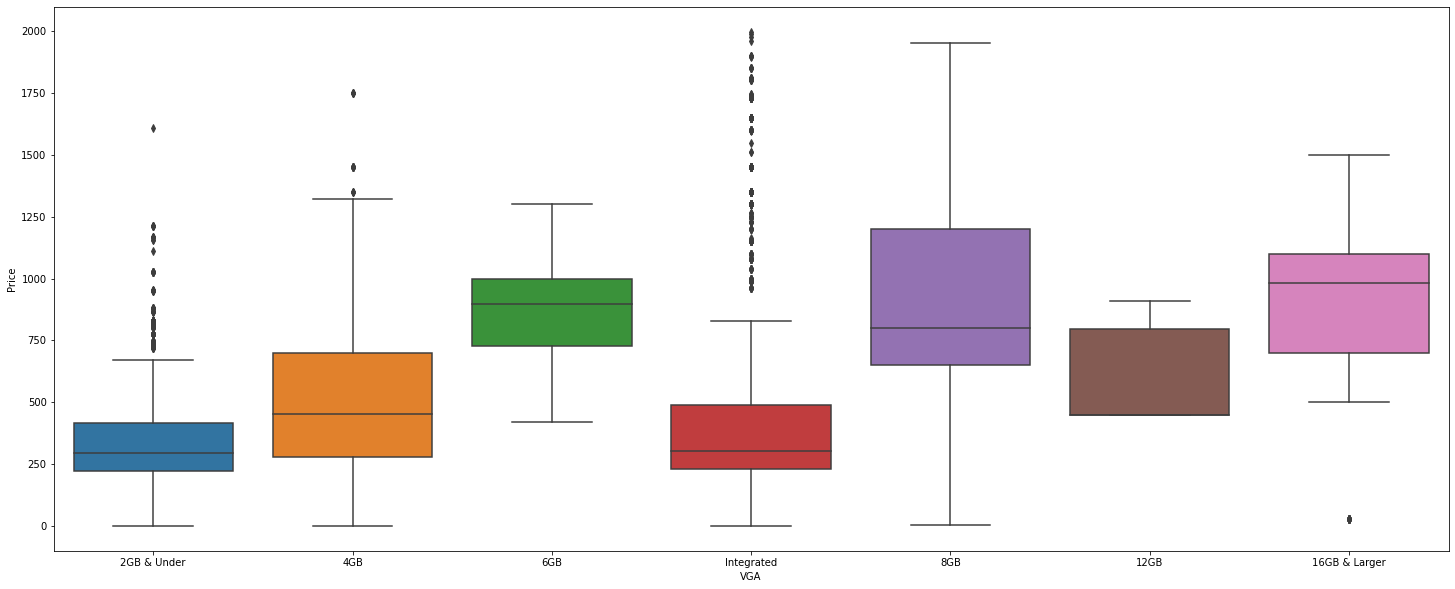

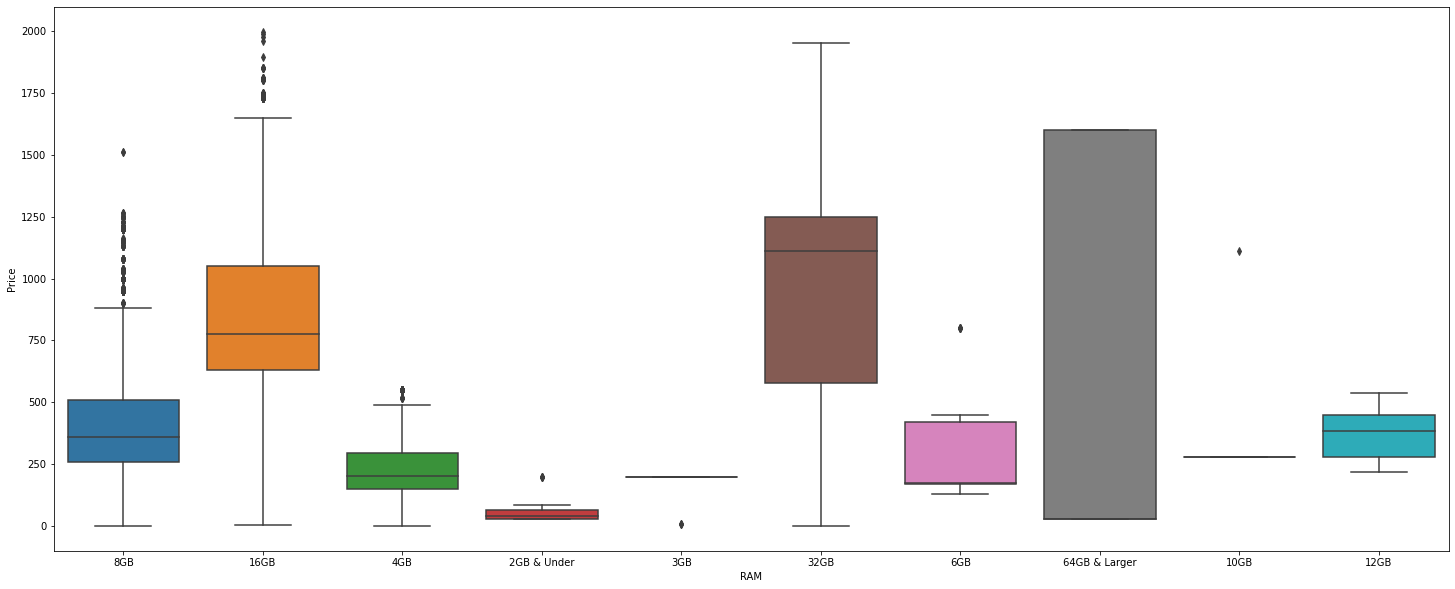

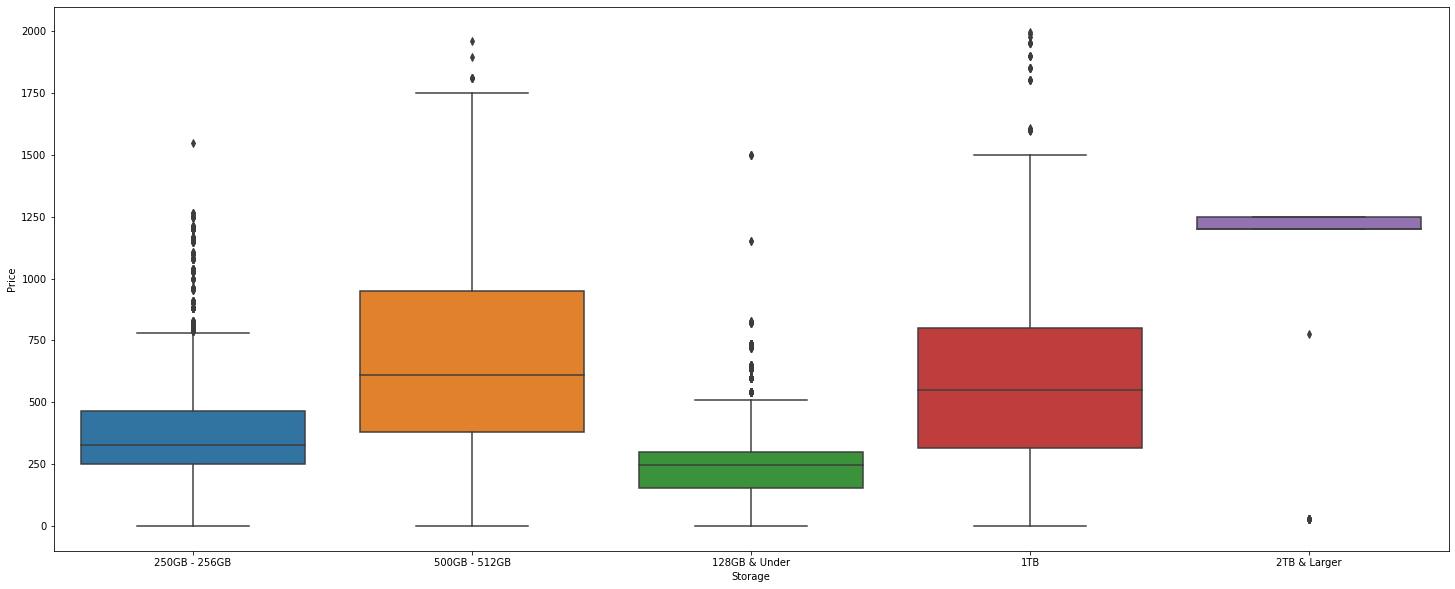

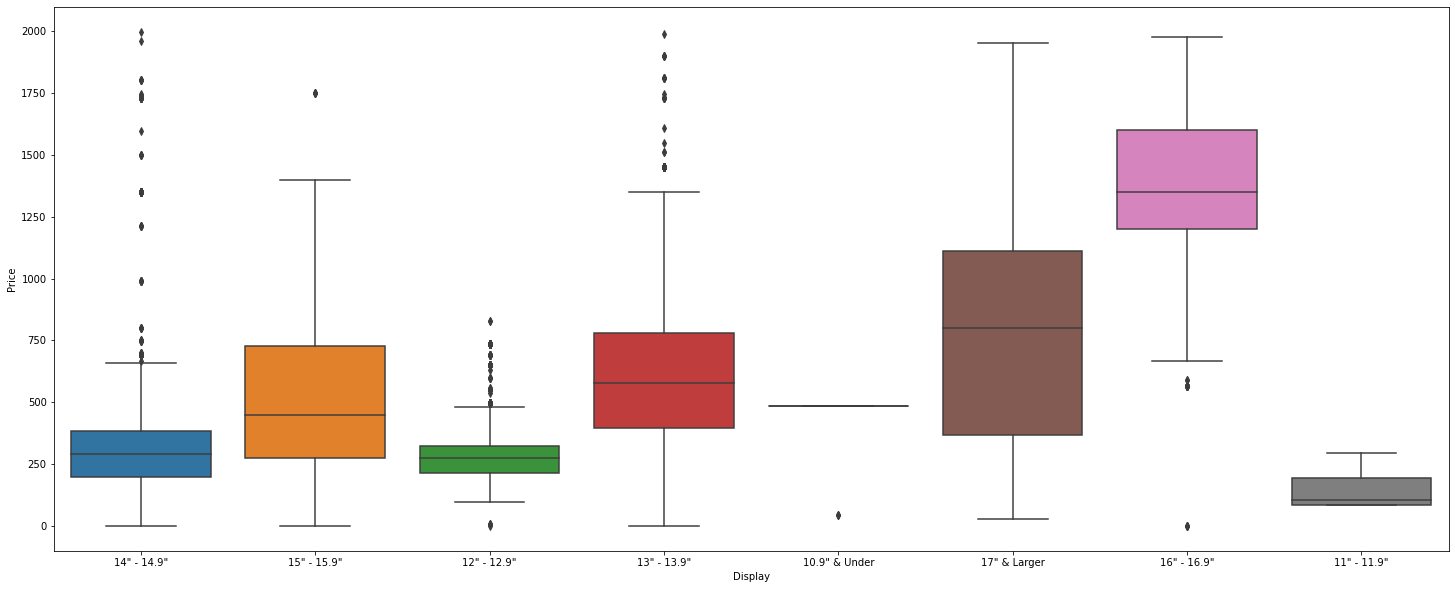

In [859]:
for feature in ['Brand', 'Processor', 'VGA', 'RAM', 'Storage', 'Display']:
    plt.figure(figsize = (25, 10))
    sns.boxplot(x = feature, y = 'Price', data = df)
    plt.show()

## Explaination: 

• As expected, Apple brand is the most expensive laptop in the market. 

• For Ram the powerful it is the more it is expensive, we can say the same for Storage as well. 

• For Processor Intel core i9 and M2 pro are the most popular and expensive one.

# <b><font color='brown'> 3. Feature Engineering </font></b>

### <b><font color='purple'>Encoding categorical variable with LabelEncoder </font></b>

In [860]:
from sklearn.preprocessing import LabelEncoder

label_encoder_gpu = LabelEncoder()

df['En_VGA'] = label_encoder_gpu.fit_transform(df['VGA'])

### **Setting dependent and response variables for feature engineering**

In [861]:
new_df = df[['Price', 'En_RAM', 'En_Storage', 'En_Display', 'En_Processor', 'En_VGA']].copy()
X = new_df.drop(['Price'], axis = 1)
y = new_df['Price']


### <font color='gold'>**Feature Importance using f_regression & ExtraTreesRegressor & SelectKBest**</font>

In [862]:
from sklearn.feature_selection import f_regression

def feature_importance(X, y):
    features = list(X.columns)
    importance_scores = f_regression(X[features], y)
    importance_df = pd.DataFrame({'Feature': features, 'Importance Score': importance_scores[0]})
    importance_df = importance_df.sort_values('Importance Score', ascending = False)

    return importance_df

In [863]:
important_features = feature_importance(X, y)
important_features

,Feature,Importance Score
0,En_RAM,6462.411885
3,En_Processor,6357.640300
1,En_Storage,2676.168400
2,En_Display,720.078536
4,En_VGA,87.500423


In [864]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor

lr = LinearRegression()
et = ExtraTreesRegressor()

et.fit(X, y)

# Get the feature importances from the ExtraTreesRegressor object
feature_importances = et.feature_importances_

# Sort the feature importances in descending order
sorted_features = sorted(zip(feature_importances, X.columns), reverse=True)

# Print the top 10 features
for importance, feature in sorted_features[:10]:
    print(feature, '------->' ,importance)

En_RAM -------> 0.2961530998292248
En_Processor -------> 0.2675091796514665
En_Display -------> 0.17191207737476483
En_Storage -------> 0.15284185619355425
En_VGA -------> 0.11158378695098956


In [865]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(f_regression, k=5)

selector.fit(X, y)
selected_features = selector.get_support()
data_selected = X[X.columns[selected_features]]
for feature in data_selected.columns:
    print(feature)

En_RAM
En_Storage
En_Display
En_Processor
En_VGA


# <font color = 'gold'> <b>Linear Regression Assumptions </b> </font>

▪ Linearity: The relationship between the independent and dependent variables is linear. This means that the change in the dependent variable is proportional to the change in the independent variable.

▪ Homoscedasticity: The variance of the residuals is constant across all values of the independent variable. This means that the errors are evenly spread out around the regression line.

▪ Normality: The residuals are normally distributed. This means that the errors are bell-shaped and symmetrical around the mean.

▪ Independence: The residuals are independent of each other. This means that the errors are not correlated with each other.

▪ Multicollinearity: There is no multicollinearity among the independent variables. This means that the independent variables are not highly correlated with each other.

## <b> <font color='green'> Heatmap & Pairplot (Check the relationship between each feature) </font> </b>

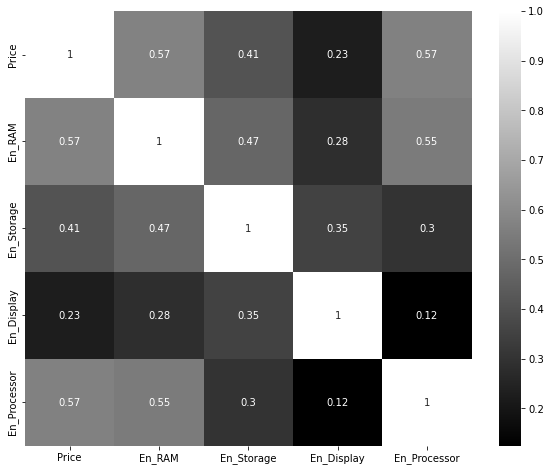

In [866]:
f, ax = plt.subplots(figsize = (10, 8))
sns.heatmap(df.select_dtypes(['int64', 'float64']).corr(), annot = True, cmap = 'gray')
plt.show()

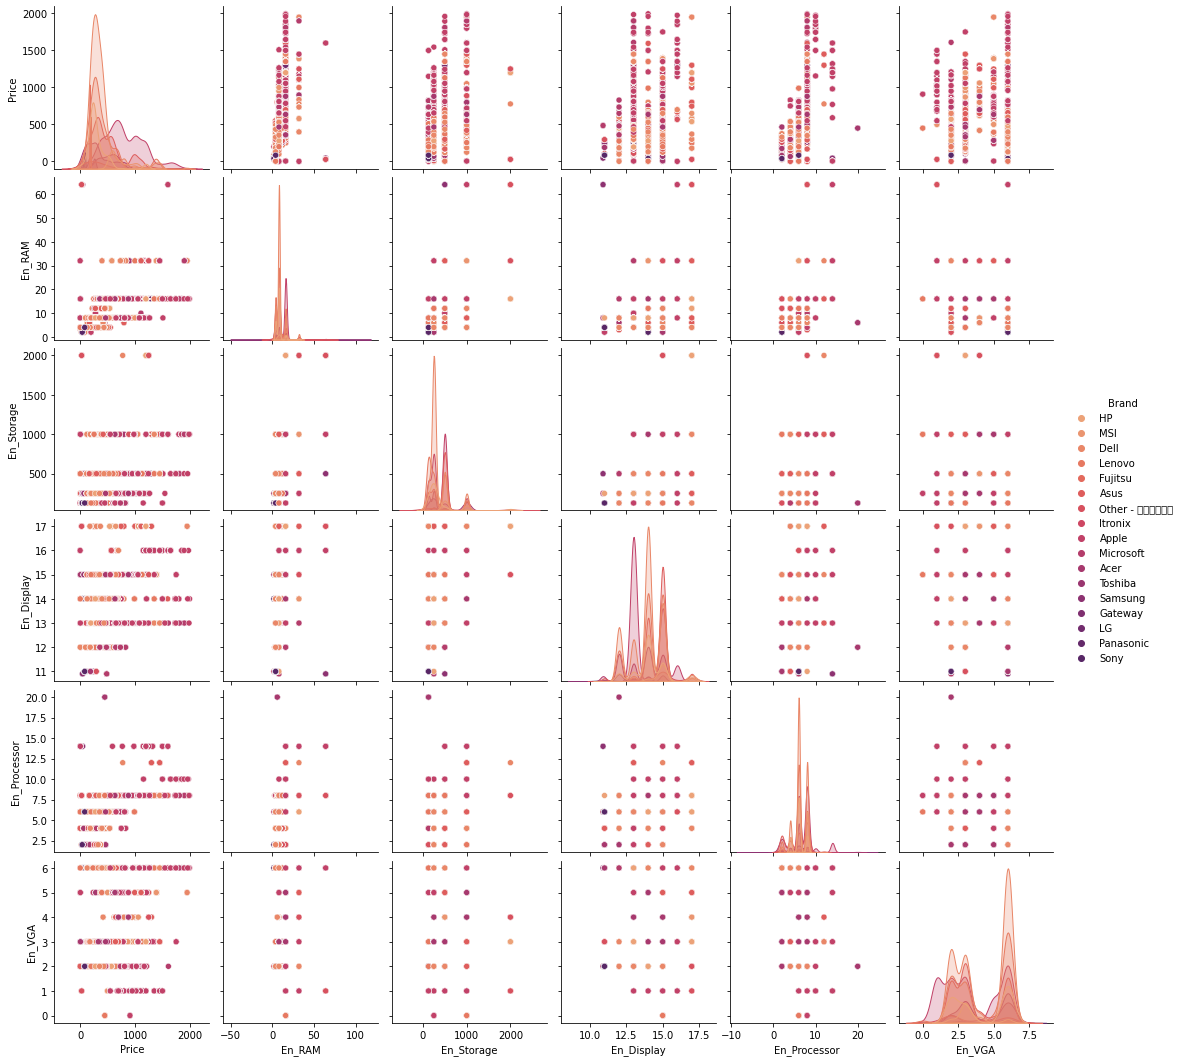

In [867]:
sns.pairplot(df, hue = 'Brand', palette = 'flare')
plt.show()

## Explaination: 

<h4> From the above correlation matrix plot and pair plot we indicate that there is no linear relation(correlation) between target variable to other variables. Thus all numerical variables are independent from one another.</h4>

## <font color='pink'>**Check for multicollinearity Variance Inflation Factor (VIF)**</font>

        Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a multiple regression model Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. This can cause the standard errors of the regression coefficients to increase, making the coefficients less reliable.
        The reason for this is that when two independent variables are highly correlated, they are essentially measuring the same thing. This means that the model is not able to distinguish between the two variables, and the standard errors of the coefficients will increase.

Here are some guidelines for interpreting VIF values:

● VIF < 1.5: No multicollinearity

● VIF = 1.5 to 5: Moderate multicollinearity

● VIF > 5: Severe multicollinearity

In [868]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({
    'Features' : new_df.columns,
    'VIF Factor' : [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]
})
vif.sort_values(by = ['VIF Factor'])

,Features,VIF Factor
2,En_Storage,3.898121
0,Price,5.327489
5,En_VGA,5.664951
1,En_RAM,6.302524
4,En_Processor,16.484962
3,En_Display,18.393529


### Interpret: 
➨ As you can see from the above dataframe we can see that all of our features have moderate and severe multicollinearity since theirs VIF factor score is higher than 1.5 and 5. 

➨ Hence, to fix this multicollinearity problem we have choose dimensionality reduction method by using PCA.

<h1> <font color = 'purple' > <b> Test for Normality using QQ-Plot</h1> </b></font>
 
<p>A QQ plot, short for quantile-quantile plot, is a graphical method for comparing a data distribution to a theoretical distribution. In a QQ plot, the quantiles of the two distributions are plotted against each other. If the data follows the theoretical distribution closely, the points on the plot will form a straight line. Deviations from the straight line indicate differences between the two distributions. A QQ plot can be used to visually assess whether the data follows a particular distribution, such as the normal distribution.</p>

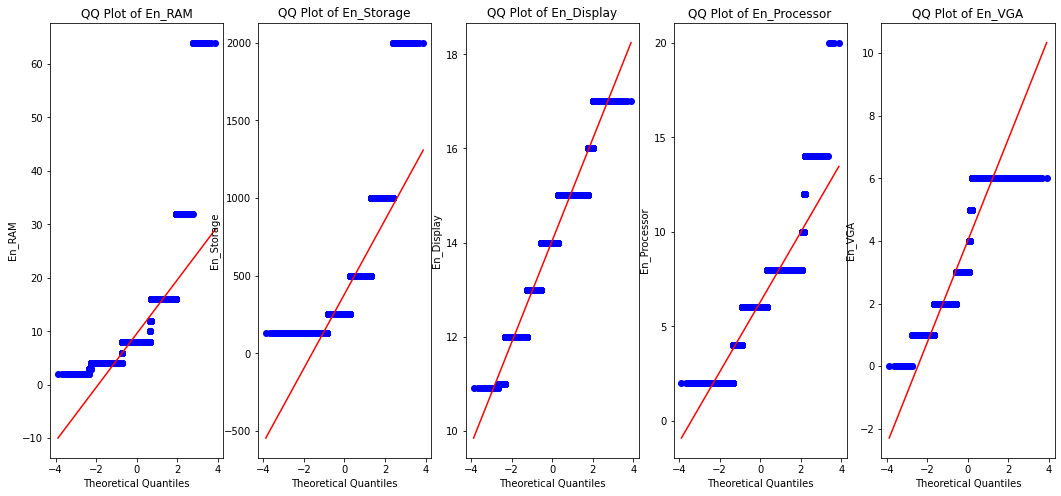

In [869]:
import scipy.stats as stats

fig, axes = plt.subplots(1, 5, figsize=(18, 8))
for i, feature in enumerate(X.columns):
    stats.probplot(X[feature], dist="norm", plot = axes[i])
    axes[i].set_title(f'QQ Plot of {feature}')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel(f'{feature}')

# Show the plots.
plt.show()

## Interpret: 
Based on the QQ plots above indicate that our features are violated with normality assumption

## <font color = 'yellow'> <b>Homoscedasticity</b></font>

A homoscedasticity plot is a scatterplot of the residuals against the predicted values in a linear regression model. If the residuals are evenly spread out around the horizontal line, then homoscedasticity is met. However, if the residuals are not evenly spread out, then homoscedasticity is not met.

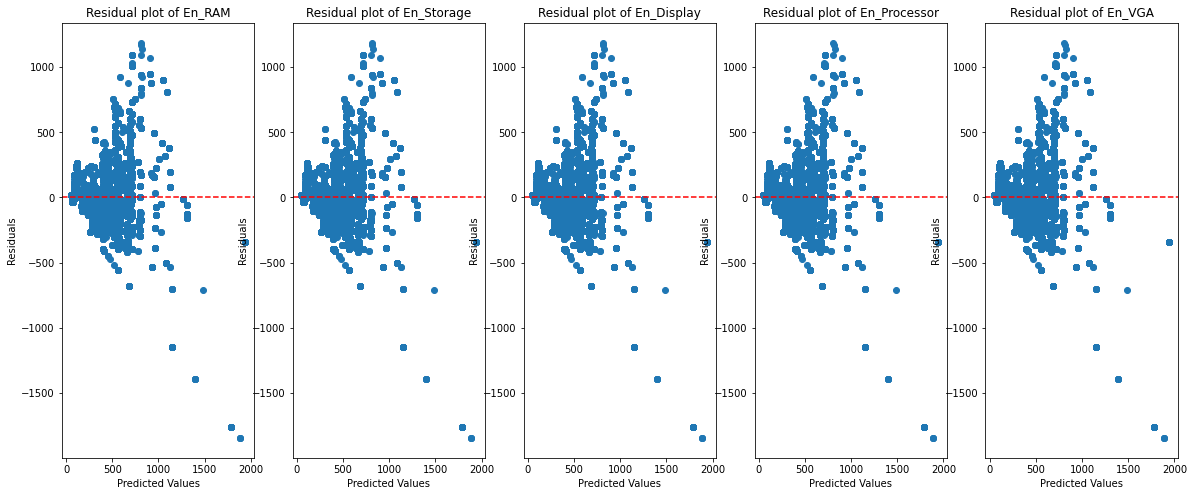

In [870]:
import statsmodels.api as sm

fig, axes = plt.subplots(1, 5, figsize=(20, 8))

# Plot the residuals for each feature.
for i, feature in enumerate(X.columns[:5]):
    model = sm.OLS(y, X).fit()
    residuals = model.resid
    axes[i].scatter(model.fittedvalues, residuals)
    axes[i].axhline(y=0, color='red', linestyle='--')
    axes[i].set_title(f'Residual plot of {feature}')
    axes[i].set_xlabel('Predicted Values')
    axes[i].set_ylabel('Residuals')

# Show the plots.
plt.show()

## Interpret: 

Base on the graphs above show that homoscedasticity is violated when the variance of the residuals is not constant across all values of the independent variable. This can happen for a number of reasons, including:

● Non-linear relationships: If the relationship between the independent and dependent variables is non-linear, then the variance of the residuals may not be constant.

● Outliers: Outliers can also cause the variance of the residuals to be non-constant.

● Heterogeneity of variance: Heterogeneity of variance refers to the situation where the variance of the dependent variable is different across different groups of observations. This can also cause the variance of the residuals to be non-constant.

## <u><font color='turquoise'>**Dimensionality reduction**</font></u>

In [871]:
X = pd.get_dummies(X)
X.head()

,En_RAM,En_Storage,En_Display,En_Processor,En_VGA
0,8,250,14.0,8.0,2
1,16,500,15.0,8.0,3
2,16,500,15.0,8.0,4
3,8,128,15.0,6.0,2
4,4,128,15.0,4.0,2


In [872]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

### <b><font color='gold'> Principal Component Analysis (PCA) </font></b>

In [873]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler_ = StandardScaler()
standardized_X_train = scaler_.fit_transform(X_train)
standardized_X_test = scaler_.fit_transform(X_test)

pca_obj = PCA(n_components = 5)

pca_obj.fit(standardized_X_train)
pca_obj.fit(standardized_X_test)

pca_X_train = pca_obj.transform(standardized_X_train)
pca_X_test = pca_obj.transform(standardized_X_test)

### <b><font color='red'> Bar Graph of Variance Ratio </font></b>

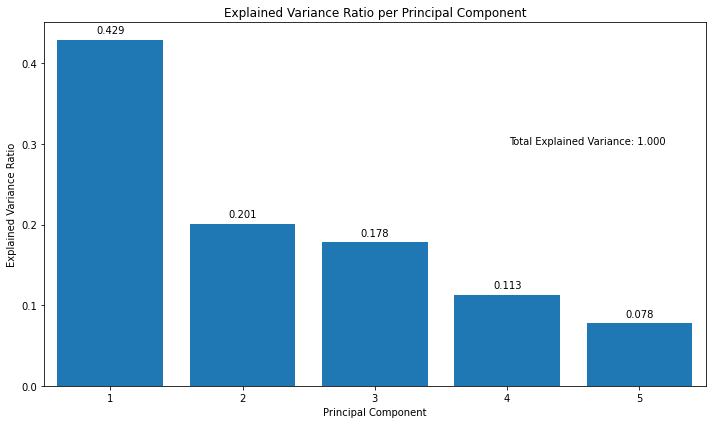

In [874]:
sorted_variance_ratio = sorted(pca_obj.explained_variance_ratio_, reverse=True)
plt.figure(figsize=(10, 6))

plt.bar(range(1, len(sorted_variance_ratio) + 1), sorted_variance_ratio)

plt.xlim(0.5, len(sorted_variance_ratio) + 0.5)
plt.xticks(range(1, len(sorted_variance_ratio) + 1))

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

for i, ratio in enumerate(sorted_variance_ratio):
    plt.text(i + 1, ratio + 0.005, f'{ratio:.3f}', ha='center', va='bottom')

total_variance_ratio = sum(sorted_variance_ratio)

text_box = f'Total Explained Variance: {total_variance_ratio:.3f}'
plt.text(len(sorted_variance_ratio) + 0.2, 0.30, text_box, ha='right')

plt.tight_layout()
plt.show()

### Cattell scree test

<font color = 'red' > <b>The Cattell scree test is a graphical method for identifying the number of principal components to retain. The scree test plots the eigenvalues of the covariance matrix against their rank, and the number of principal components to retain is determined by the point at which the scree plot starts to level off. </font> </b>

In [875]:
eigenvalues = np.linalg.eigvalsh(np.cov(X.T))

def cattle_scree_test(eigenvalues):
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues)
    plt.title('Cattell Scree Plot')
    plt.xlabel('Eigenvalue Rank')
    plt.ylabel('Eigenvalue')
    plt.show()
    
    num_components = np.argmax(np.diff(eigenvalues)) + 1
    return num_components

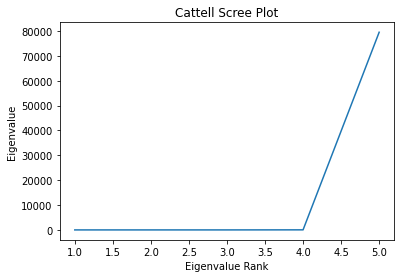

The number of principal components to retain is: 4


In [876]:
num_components = cattle_scree_test(eigenvalues)
print("The number of principal components to retain is:", num_components)

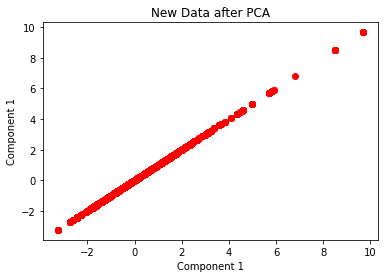

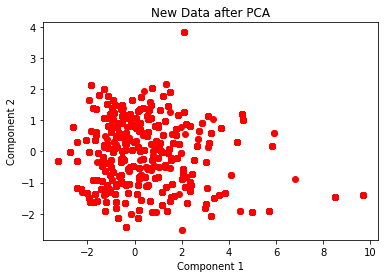

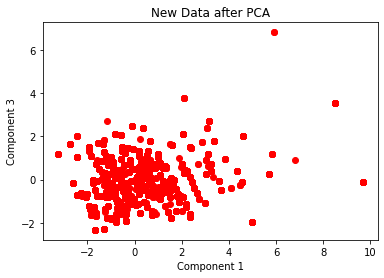

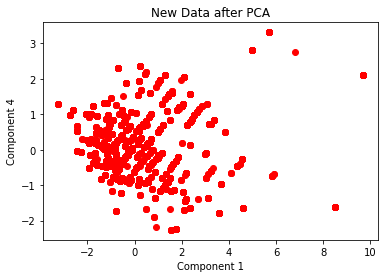

In [877]:
pca_obj = PCA(n_components = 4)
pca_obj.fit(standardized_X_train)
pca_X_train = pca_obj.transform(standardized_X_train)
pca_X_test = pca_obj.transform(standardized_X_test)

for i in range(0, 4):
    plt.scatter(pca_X_train[:, 0], pca_X_train[:, i], c='red')
    plt.xlabel('Component 1')
    plt.ylabel(f'Component {i + 1}')
    plt.title('New Data after PCA')
    plt.show()

In [878]:
pca_X_train.shape

(8952, 4)

In [879]:
pca_X_test.shape

(4410, 4)

#### VIF Factor's score after performing Principle Component Analysis

In [880]:
vif = pd.DataFrame({
    'Component' : [1, 2, 3, 4],
    'VIF Factor' : [variance_inflation_factor(pca_X_train, i) for i in range(pca_X_train.shape[1])]
})
vif

,Component,VIF Factor
0,1,1.0
1,2,1.0
2,3,1.0
3,4,1.0


# <font color='red'><u>**Model Creation & Evaluation**</u></font>

In [881]:
df_train, df_test = pd.DataFrame({
    'x1' : pca_X_train[:, 0],
    'x2' : pca_X_train[:, 1],
    'x3' : pca_X_train[:, 2],
    'x4' : pca_X_train[:, 3]
}), pd.DataFrame({
    'x1' : pca_X_test[:, 0],
    'x2' : pca_X_test[:, 1],
    'x3' : pca_X_test[:, 2],
    'x4' : pca_X_test[:, 3],
})
df_train, df_test

(            x1        x2        x3        x4
 0    -0.522884  0.920622 -1.320238 -0.784475
 1     0.172555 -1.870576 -0.318161  1.927380
 2     1.540304 -0.204664  0.087709 -0.493510
 3    -1.338643 -0.185812  1.644891  0.455513
 4    -0.798530 -1.106455  0.189803 -0.197856
 ...        ...       ...       ...       ...
 8947  0.892685  0.113880 -1.612309 -2.172717
 8948  0.172555 -1.870576 -0.318161  1.927380
 8949 -1.271186 -0.625924  0.295496 -0.706004
 8950  2.330979 -1.196944  0.136001  0.781449
 8951 -1.170676 -1.074831 -0.009710 -0.124572
 
 [8952 rows x 4 columns],
             x1        x2        x3        x4
 0    -2.394946 -1.197193 -0.712213 -0.032012
 1     1.674078  0.251159 -0.172460 -0.419074
 2    -0.555405  1.355692  0.029756  0.372596
 3     0.442711  0.026942 -1.024021  0.047389
 4     2.661697  0.191024 -0.629576  1.022394
 ...        ...       ...       ...       ...
 4405  1.674078  0.251159 -0.172460 -0.419074
 4406  0.706000  1.079249 -0.221357  0.273348
 4407 

In [882]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression_model(y_true, y_pred):
    
    evaluate_model_df = pd.DataFrame({
        'MSE' : [mean_squared_error(y_true, y_pred)],
        'RMSE' : [np.sqrt(mean_squared_error(y_true, y_pred))],
        'MAE' : [mean_absolute_error(y_true, y_pred)],
        'R2' : [r2_score(y_true, y_pred)]
    })
    
    return evaluate_model_df.style.format({
        "MSE" :  "{:.4f}", 
        "RMSE" : "{:.4f}",
        "MAE" : "{:,.4f}",
        'R2' : "{:,.4f}"
    })

### <font color='turquoise'>**Model-1: Mutiple Linear Regression**</font>

In [883]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(df_train, y_train)

y_pred = model_1.predict(df_test)
y_pred

array([ 73.58349766, 718.32153844, 389.04080229, ..., 463.1973335 ,
       661.36924461, 550.89728575])

In [884]:
residuals = y_pred - y_test
pd.DataFrame({'Residuals' : residuals}).head(15)

,Residuals
12497,34.583498
7344,-471.678462
10235,-170.959198
8505,98.197333
6870,224.470332
13718,127.097317
7020,136.646175
2191,-74.235006
7893,15.591961
6741,472.879205


In [885]:
evaluate_regression_model(y_test, y_pred)

,MSE,RMSE,MAE,R2
0,61908.6590,248.8145,176.7271,0.4364


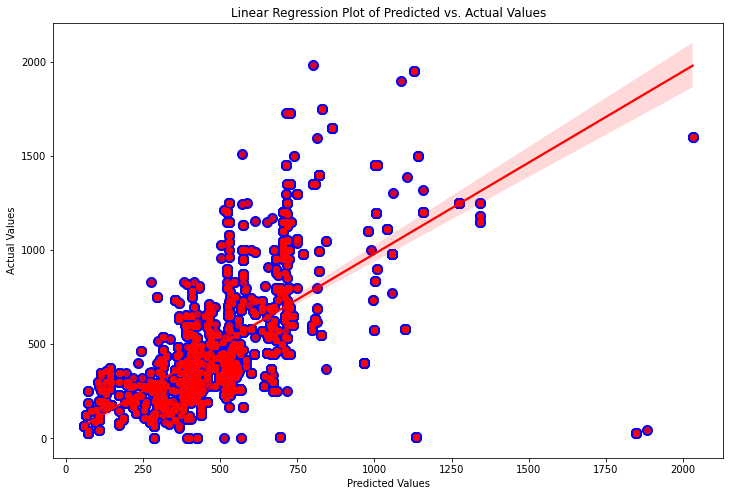

In [886]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_pred, y_test, color='blue', s=100)
line_fit = sns.regplot(x = y_pred, y = y_test, color='red')

plt.title('Linear Regression Plot of Predicted vs. Actual Values')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

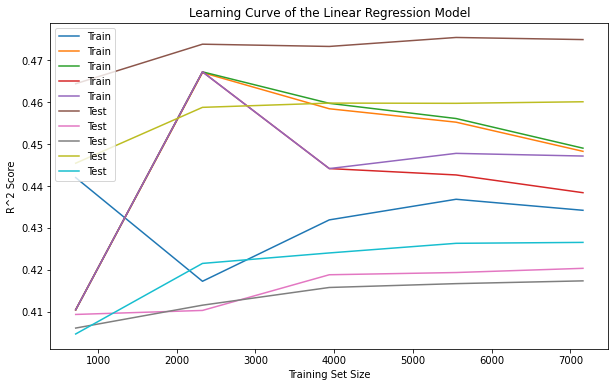

In [887]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(
    model_1, df_train, y_train, cv=5
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Train")
plt.plot(train_sizes, test_scores, label="Test")
plt.title("Learning Curve of the Linear Regression Model")
plt.xlabel("Training Set Size")
plt.ylabel("R^2 Score")
plt.legend()

# Show the plot
plt.show()

### Interpret : 
- The model's performance on both the training set and the test set increases as the size of the training set increases. This is a good sign, as it means that the model is able to learn from the data and improve its performance.

- The rate of increase in the model's performance on the test set starts to slow down after a certain point. This is a sign that the model is starting to approach the limits of its ability to learn from the data.

- The model's performance on the test set plateaus after the training set reaches a size of around 1000. This is a sign that the model is no longer able to learn more about the underlying relationship between the features and the target variable.

Overall, the learning curve graph shows that the model is a good fit for the data, and that it is able to generalize well to new data. However, it is important to note that the model's performance on the test set will eventually plateau, even if the training set is made infinitely large. This is because there is only so much information that can be learned from the data.

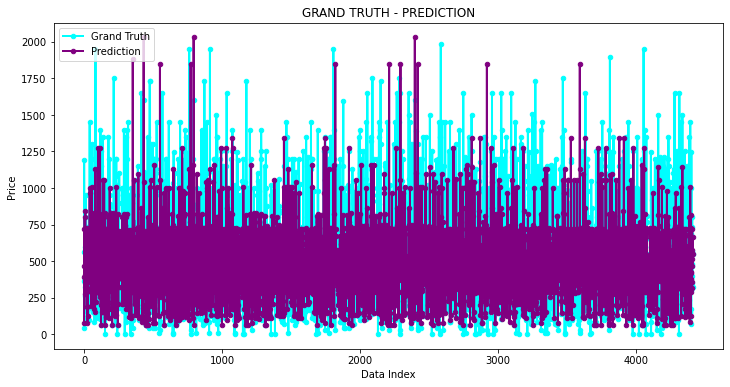

In [888]:
indexes = range(0, 4410)

# Grand Truth
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(indexes, y_test, label='Grand Truth', color='cyan', linewidth=2, marker=".",ms=9)

# Prediction
ax.plot(indexes, y_pred, label='Prediction', color='purple', linewidth=2, marker=".",ms=9)

plt.title('GRAND TRUTH - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()

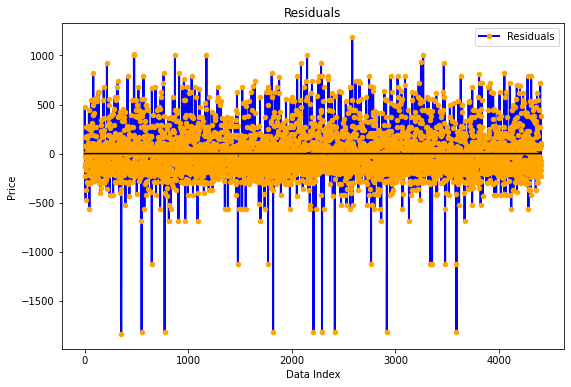

In [889]:
fig,axes = plt.subplots(figsize=(9,6))
axes.plot(indexes, y_test - y_pred,color='blue', linewidth = 2, marker=".", ms=9, mfc="orange", mec="orange", label="Residuals")
axes.plot(indexes, np.zeros(4410),color="black")

plt.title('Residuals')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

### <font color='turquoise'>**Interpret : From the above inductions show that the linear assumptions of our dataset are all violated. So it is not a surprise that Multiple Linear Regression model does not work well with our data with R-square score of only 0.4533.**</font>

### <font color='lightgreen'>**Model-2: Polynomial Regression**</font>

In [890]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
X_poly_train, X_poly_test = poly.fit_transform(df_train), poly.fit_transform(df_test)
poly.fit(X_poly_train, y_train)

PolynomialFeatures(degree=3)

In [891]:
lr = LinearRegression()
lr.fit(X_poly_train, y_train)

LinearRegression()

In [892]:
y_pred1 = lr.predict(X_poly_test)
y_pred1

array([158.32793718, 808.9032178 , 375.63006816, ..., 529.07091145,
       836.48955354, 440.71359635])

In [893]:
residuals = y_pred1 - y_test
pd.DataFrame({'Residuals' : residuals}).head(15)

,Residuals
12497,119.327937
7344,-381.096782
10235,-184.369932
8505,164.070911
6870,13.138349
13718,271.634673
7020,105.334193
2191,-106.864734
7893,10.668431
6741,867.370381


In [894]:
evaluate_regression_model(y_test, y_pred1)

,MSE,RMSE,MAE,R2
0,43895.4604,209.5124,151.7582,0.6004


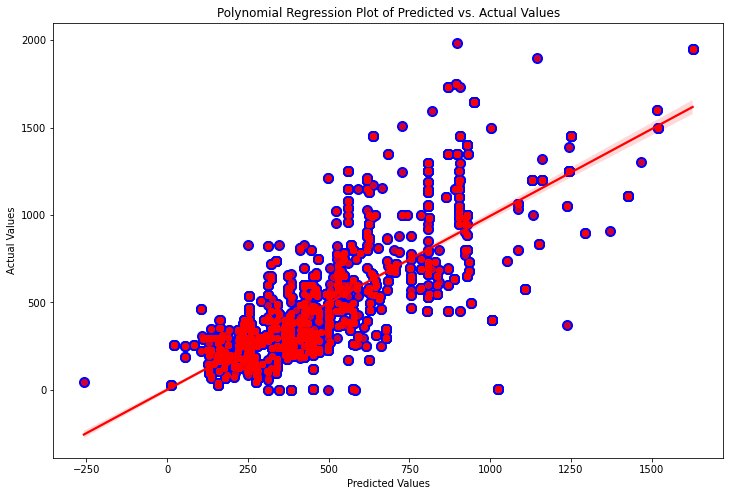

In [895]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(y_pred1, y_test, color='blue', s=100)
line_fit = sns.regplot(x = y_pred1, y = y_test, color='red')

plt.title('Polynomial Regression Plot of Predicted vs. Actual Values')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

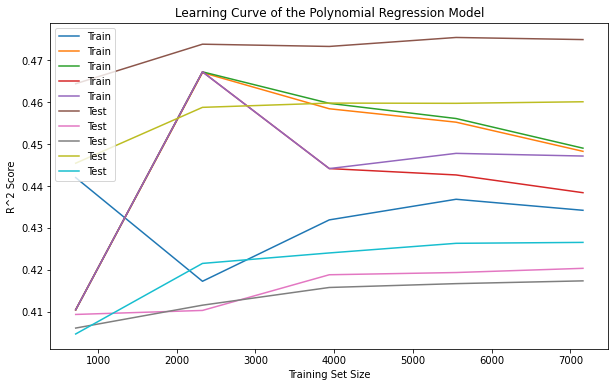

In [896]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(
    lr, df_train, y_train, cv=5
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Train")
plt.plot(train_sizes, test_scores, label="Test")
plt.title("Learning Curve of the Polynomial Regression Model")
plt.xlabel("Training Set Size")
plt.ylabel("R^2 Score")
plt.legend()

# Show the plot
plt.show()

### Intepret : 

- The model's performance on the training set starts to decrease after the training set reaches a size of around 100. This is a sign that the model is starting to overfit the training set.

- The model's performance on the test set starts to increase after the training set reaches a size of around 100. This is a sign that the model is able to learn more about the underlying relationship between the features and the target variable as the training set gets larger.

- The model's performance on the test set plateaus after the training set reaches a size of around 200. This is a sign that the model is no longer able to learn more about the underlying relationship between the features and the target variable.

Overall, the learning curve graph shows that the model is a good fit for the data, but it is important to avoid overfitting the model. This can be done by using a regularization technique, such as L2 regularization.

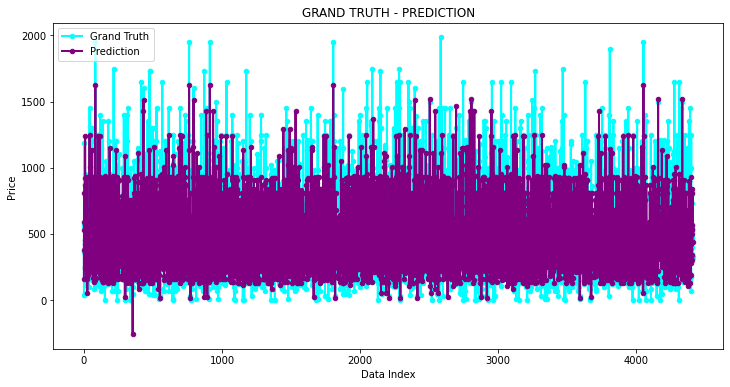

In [897]:
indexes = range(0, 4410)

# Grand Truth
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(indexes, y_test, label='Grand Truth', color='cyan', linewidth=2, marker=".",ms=9)

# Prediction
ax.plot(indexes, y_pred1, label='Prediction', color='purple', linewidth=2, marker=".",ms=9)

plt.title('GRAND TRUTH - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()

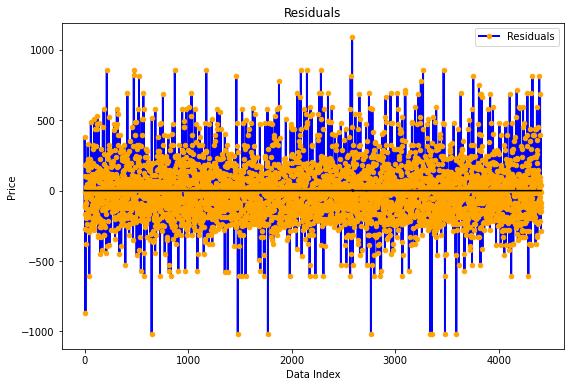

In [898]:
fig,axes = plt.subplots(figsize=(9,6))
axes.plot(indexes, y_test - y_pred1,color='blue', linewidth = 2, marker=".", ms=9, mfc="orange", mec="orange", label="Residuals")
axes.plot(indexes, np.zeros(4410),color="black")

plt.title('Residuals')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

### <font color='lightgreen'>**Interpret : From The evualuation metrics above we can see that the Rsquare of our Polynomial Regression is a bit better then the previous Linear Regression with the score of 0.5524. We are going to try out different model until we find the perfect model that fit well with our dataset**</font>

### <font color='pink'>**Model-3: Regularization Regression**</font>

In Model Regularization Regression has 2 major which are the most use regularization techniques
There are:
- Ridge Regularization (L1)
- Lasso Regularization(L2)

In [899]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [900]:
ridge, lasso = Ridge(alpha=.1), Lasso(alpha=.1)
ridge.fit(df_train, y_train), lasso.fit(df_train, y_train)

(Ridge(alpha=0.1), Lasso(alpha=0.1))

In [901]:
y_pred_ridge, y_pred_lasso = ridge.predict(df_test), lasso.predict(df_test)

In [902]:
evaluate_regression_model(y_test, y_pred_ridge)

,MSE,RMSE,MAE,R2
0,61908.6398,248.8145,176.7271,0.4364


In [903]:
evaluate_regression_model(y_test, y_pred_lasso)

,MSE,RMSE,MAE,R2
0,61907.1349,248.8114,176.7145,0.4364


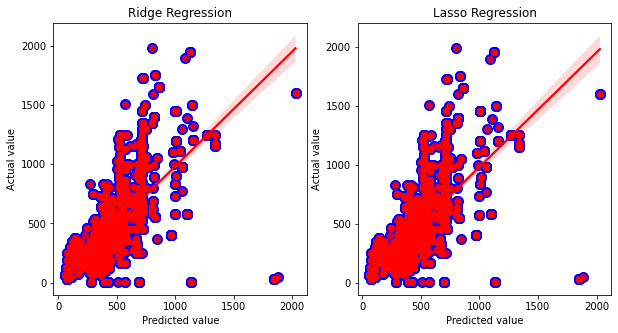

In [904]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].scatter(y_pred_ridge, y_test, color='blue', s=100)
line_fit = sns.regplot(x = y_pred_ridge, y = y_test, color='red', ax=axes[0])
axes[0].set_title('Ridge Regression')
axes[0].set_xlabel('Predicted value')
axes[0].set_ylabel('Actual value')

axes[1].scatter(y_pred_lasso, y_test, color='blue', s=100)
line_fit = sns.regplot(x = y_pred_lasso, y = y_test, color='red', ax=axes[1])
axes[1].set_title('Lasso Regression')
axes[1].set_xlabel('Predicted value')
axes[1].set_ylabel('Actual value')

plt.show()

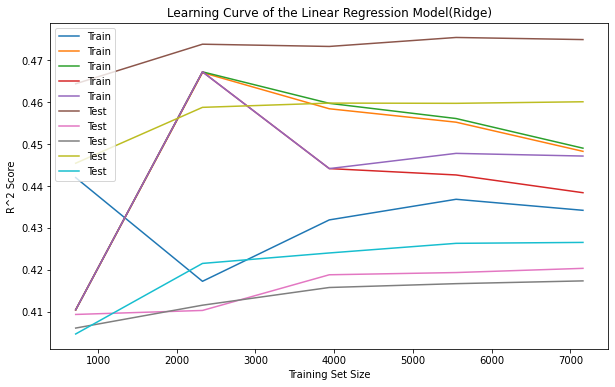

In [905]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(
    ridge, df_train, y_train, cv=5
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Train")
plt.plot(train_sizes, test_scores, label="Test")
plt.title("Learning Curve of the Linear Regression Model(Ridge)")
plt.xlabel("Training Set Size")
plt.ylabel("R^2 Score")
plt.legend()

# Show the plot
plt.show()

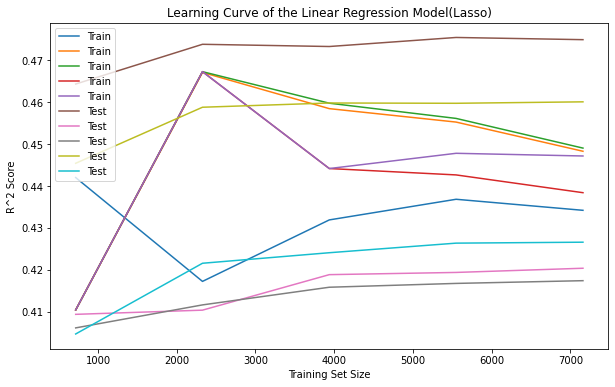

In [906]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(
    lasso, df_train, y_train, cv=5
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Train")
plt.plot(train_sizes, test_scores, label="Test")
plt.title("Learning Curve of the Linear Regression Model(Lasso)")
plt.xlabel("Training Set Size")
plt.ylabel("R^2 Score")
plt.legend()

# Show the plot
plt.show()

### <font color='yellow'>**Model-4: Random Forest**</font>

In [907]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "random_state": [42],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring="neg_mean_squared_error"
)

# Fit the grid search regressor to the training data
grid_search.fit(df_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


In [908]:
model_4 = RandomForestRegressor(max_depth = 7, min_samples_split = 2, n_estimators = 300, random_state = 42)

model_4.fit(df_train, y_train)

model_4.fit(df_train, y_train)

y_pred = model_4.predict(df_test)
y_pred

array([ 53.62470426, 848.54585722, 429.53623775, ..., 496.14605405,
       691.68208624, 363.79215569])

In [909]:
residuals = y_pred1 - y_test
pd.DataFrame({'Residuals' : residuals}).head(15)

,Residuals
12497,119.327937
7344,-381.096782
10235,-184.369932
8505,164.070911
6870,13.138349
13718,271.634673
7020,105.334193
2191,-106.864734
7893,10.668431
6741,867.370381


In [910]:
evaluate_regression_model(y_test, y_pred)

,MSE,RMSE,MAE,R2
0,24591.2011,156.8158,109.6203,0.7761


In [911]:
from sklearn.model_selection import cross_val_score

# Create a cross-validation object
cv = cross_val_score(model_4, df_train, y_train, cv=5)

# Print the cross-validation scores
print(cv)

[0.81712413 0.78100372 0.77318242 0.81251156 0.78609972]


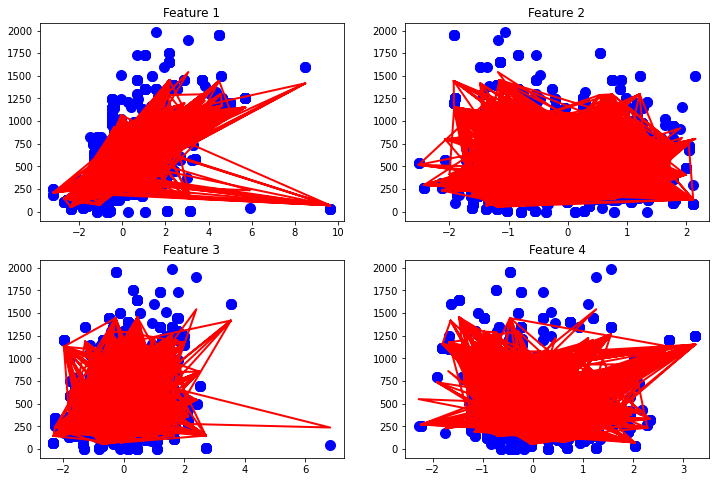

In [912]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i in range(0, 4):
    ax[i // 2, i % 2].scatter(df_test.iloc[:, i], y_test, color='blue', s=100)
    ax[i // 2, i % 2].plot(df_test.iloc[:, i], y_pred, color='red', linewidth=2)
    ax[i // 2, i % 2].set_title(f'Feature {i + 1}')

plt.show()

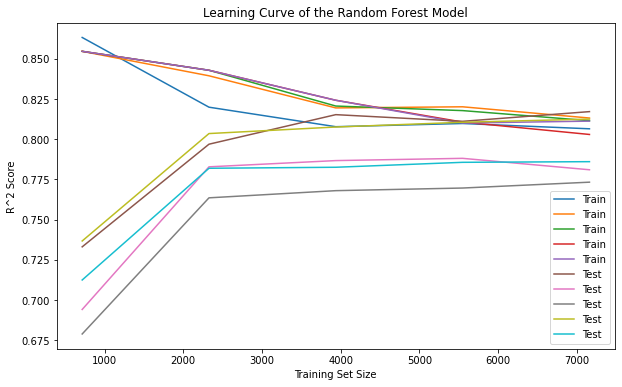

In [913]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(
    model_4, df_train, y_train, cv=5
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Train")
plt.plot(train_sizes, test_scores, label="Test")
plt.title("Learning Curve of the Random Forest Model")
plt.xlabel("Training Set Size")
plt.ylabel("R^2 Score")
plt.legend()

# Show the plot
plt.show()

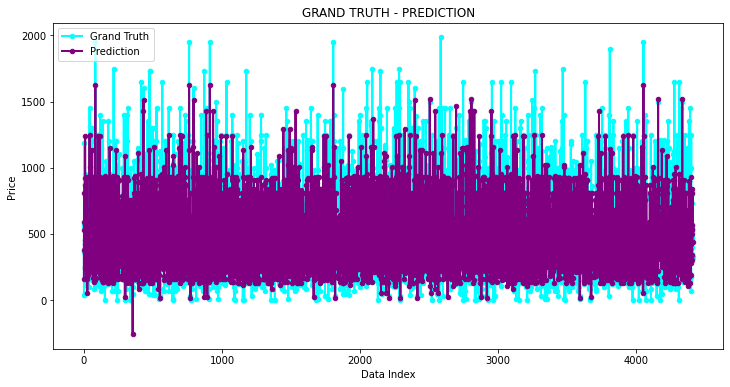

In [914]:
indexes = range(0, 4410)

# Grand Truth
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(indexes, y_test, label='Grand Truth', color='cyan', linewidth=2, marker=".",ms=9)

# Prediction
ax.plot(indexes, y_pred1, label='Prediction', color='purple', linewidth=2, marker=".",ms=9)

plt.title('GRAND TRUTH - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()

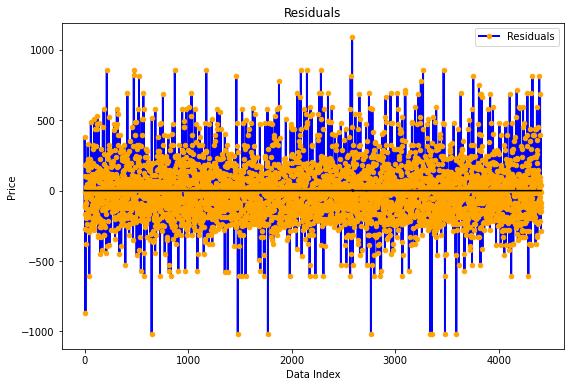

In [915]:
fig,axes = plt.subplots(figsize=(9,6))
axes.plot(indexes, y_test - y_pred1,color='blue', linewidth = 2, marker=".", ms=9, mfc="orange", mec="orange", label="Residuals")
axes.plot(indexes, np.zeros(4410),color="black")

plt.title('Residuals')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

### <font color='yellow'>**From the evaluation metrics above indicated that the more complex the model is, the more they are able to learn the complicate patterns of our data well. We going to try out more different complex model to see how well they can learn about our data. In this case, model random forest has a Rsquare score of 0.7672.**</font>

### <font color='lightpink'>**Model-5: Support Vector Regressor**</font>

In [916]:
from sklearn.svm import SVR

In [917]:
param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [10, 100, 1000],
    "epsilon": [0.1, 0.01, 0.001],
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5)

# Fit the model to the data
grid_search.fit(df_test, y_test)

# Print the best parameters
print(grid_search.best_params_)

{'C': 1000, 'epsilon': 0.1, 'kernel': 'rbf'}


In [918]:
svr = SVR(kernel="rbf", C=1000, epsilon=0.1)

# Fit the model to the data
svr.fit(df_test, y_test)

# Make predictions
predictions = svr.predict(df_test)

In [919]:
evaluate_regression_model(y_test, predictions)

,MSE,RMSE,MAE,R2
0,28251.3208,168.0813,97.3878,0.7428


In [920]:
from sklearn.model_selection import cross_val_score

# Create a cross-validation object
cv = cross_val_score(model_4, df_train, y_train, cv=5)

# Print the cross-validation scores
print(cv)

[0.81712413 0.78100372 0.77318242 0.81251156 0.78609972]


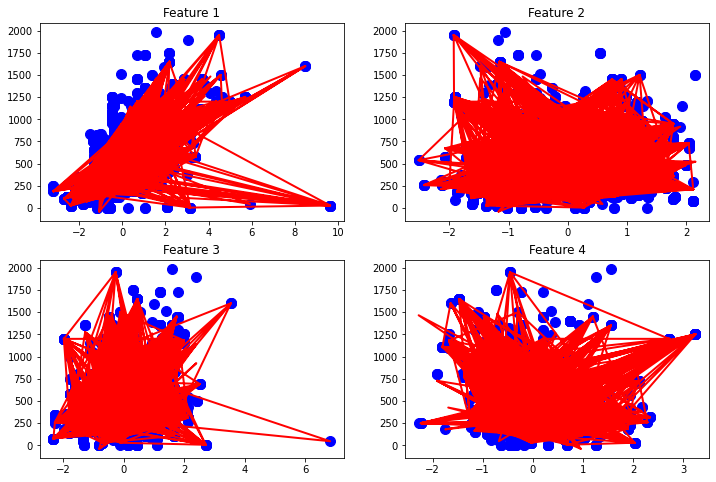

In [921]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i in range(0, 4):
    ax[i // 2, i % 2].scatter(df_test.iloc[:, i], y_test, color='blue', s=100)
    ax[i // 2, i % 2].plot(df_test.iloc[:, i], predictions, color='red', linewidth=2)
    ax[i // 2, i % 2].set_title(f'Feature {i + 1}')

plt.show()

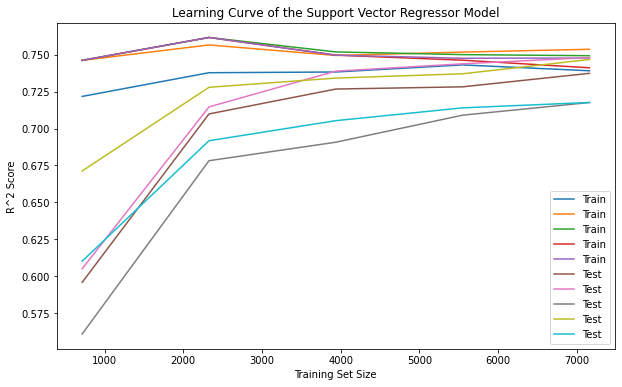

In [922]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create a learning curve for the model
train_sizes, train_scores, test_scores = learning_curve(
    svr, df_train, y_train, cv=5
)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Train")
plt.plot(train_sizes, test_scores, label="Test")
plt.title("Learning Curve of the Support Vector Regressor Model")
plt.xlabel("Training Set Size")
plt.ylabel("R^2 Score")
plt.legend()

# Show the plot
plt.show()

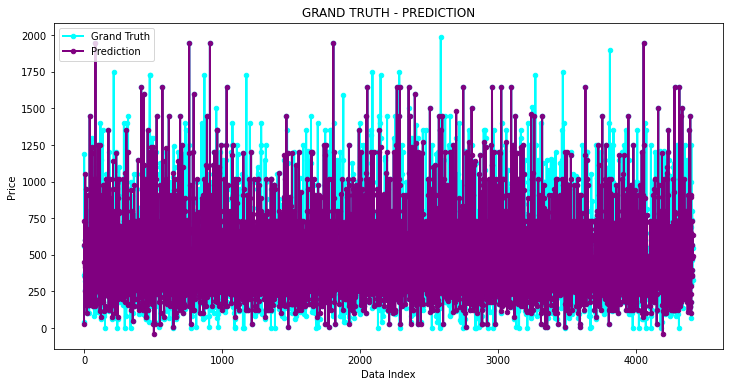

In [923]:
indexes = range(0, 4410)

# Grand Truth
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(indexes, y_test, label='Grand Truth', color='cyan', linewidth=2, marker=".",ms=9)

# Prediction
ax.plot(indexes, predictions, label='Prediction', color='purple', linewidth=2, marker=".",ms=9)

plt.title('GRAND TRUTH - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()

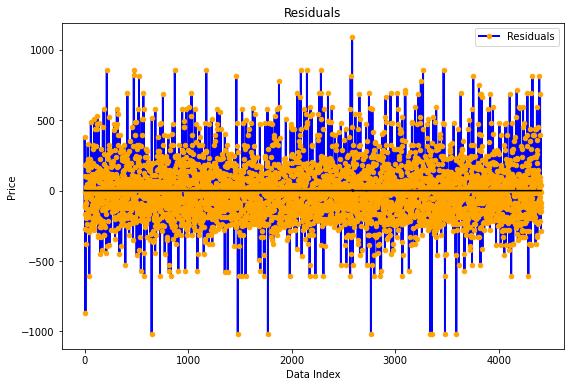

In [924]:
fig,axes = plt.subplots(figsize=(9,6))
axes.plot(indexes, y_test - y_pred1,color='blue', linewidth = 2, marker=".", ms=9, mfc="orange", mec="orange", label="Residuals")
axes.plot(indexes, np.zeros(4410),color="black")

plt.title('Residuals')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()

### <font color='lightblue'>**Model-6: Neural Network**</font>

In [925]:
import tensorflow as tf
# from keras.wrappers.scikit_learn import KerasClassifier

# param_grid = {
#     'optimizer': ['rmsprop', 'adam'],
#     'init': ['glorot_uniform', 'normal', 'uniform'],
#     'epochs': np.array([50, 100, 150]),
#     'batch_size': np.array([5, 10, 20]),
# }

# # Create the Keras model
# def create_model(optimizer, init, epochs, batch_size):
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Dense(100, activation="relu", input_shape=(df_train.shape[1],)),
#         tf.keras.layers.Dense(100, activation="relu"),
#         tf.keras.layers.Dense(1, activation="linear")
#     ])
#     model.compile(loss="mse", optimizer=optimizer)
#     return model

# # Create the KerasClassifier object
# model = KerasClassifier(build_fn=create_model)

# # Create the grid search object
# grid_search = GridSearchCV(model, param_grid, cv=5)

# # Fit the grid search object to the data
# grid_search.fit(df_train, y_train)

# # Print the best parameters
# print(grid_search.best_params_)

### Hyperparameter using Gridsearch cv: 

{
    'batch_size' : 5, 'epochs' : 50, 'init' : 'glorot_uniform', 'optimizer', 'rmsprop'
}

In [954]:
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, activation="relu", input_shape=(df_train.shape[1],)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])
model_6.compile(loss="mse", optimizer="rmsprop")
history = model_6.fit(df_train, y_train, epochs=50, validation_data=(df_test, y_test))

# Get the training and test losses
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

Epoch 1/50


280/280 [==============================] - 1s 1ms/step - loss: 336277.0625 - val_loss: 312342.7812
Epoch 2/50
280/280 [==============================] - 0s 1ms/step - loss: 273536.5000 - val_loss: 196238.1406
Epoch 3/50
280/280 [==============================] - 0s 1ms/step - loss: 127377.1016 - val_loss: 77229.2891
Epoch 4/50
280/280 [==============================] - 0s 1ms/step - loss: 77252.7578 - val_loss: 69985.0078
Epoch 5/50
280/280 [==============================] - 0s 1ms/step - loss: 72575.3906 - val_loss: 66683.6797
Epoch 6/50
280/280 [==============================] - 0s 1000us/step - loss: 69804.3984 - val_loss: 64773.1016
Epoch 7/50
280/280 [==============================] - 0s 1ms/step - loss: 67740.1719 - val_loss: 63521.7578
Epoch 8/50
280/280 [==============================] - 0s 1ms/step - loss: 66444.1484 - val_loss: 62755.1055
Epoch 9/50
280/280 [==============================] - 0s 1ms/step - loss: 65665.7109 - val_loss: 62250.5430
Epoch 10/50
280/280 [==========

In [955]:
predictions = model_6.predict(df_test)

138/138 [==============================] - 0s 584us/step


In [956]:
evaluate_regression_model(y_test, predictions)

,MSE,RMSE,MAE,R2
0,53943.7517,232.2579,156.8713,0.5089


In [957]:
from sklearn.model_selection import cross_val_score

# Create a cross-validation object
cv = cross_val_score(model_4, df_train, y_train, cv=5)

# Print the cross-validation scores
print(cv)

[0.81712413 0.78100372 0.77318242 0.81251156 0.78609972]


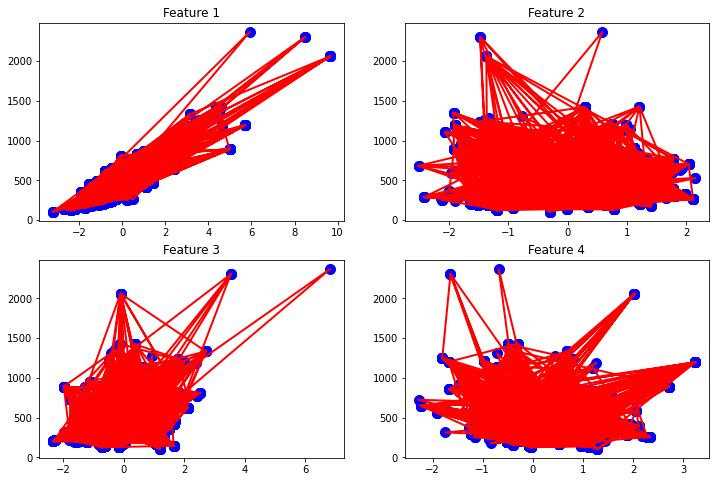

In [958]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

for i in range(0, 4):
    ax[i // 2, i % 2].scatter(df_test.iloc[:, i], predictions, color='blue', s=100)
    ax[i // 2, i % 2].plot(df_test.iloc[:, i], predictions, color='red', linewidth=2)
    ax[i // 2, i % 2].set_title(f'Feature {i + 1}')

plt.show()

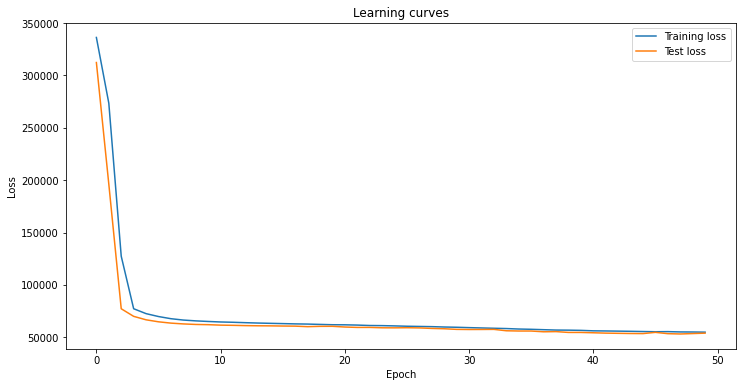

In [959]:
plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(train_loss, label="Training loss")
plt.plot(test_loss, label="Test loss")
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

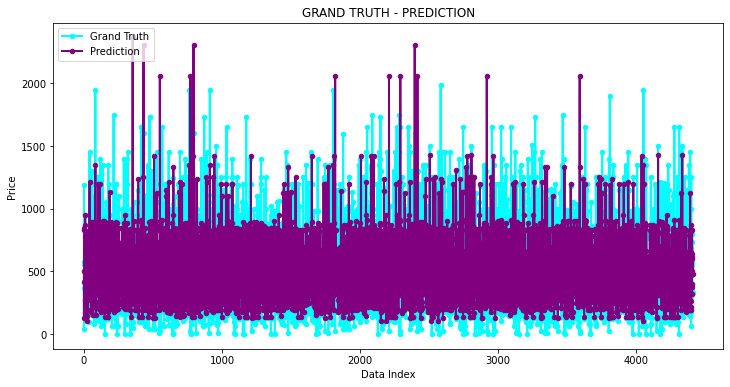

In [960]:
indexes = range(0, 4410)

# Grand Truth
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(indexes, y_test, label='Grand Truth', color='cyan', linewidth=2, marker=".",ms=9)

# Prediction
ax.plot(indexes, predictions, label='Prediction', color='purple', linewidth=2, marker=".",ms=9)

plt.title('GRAND TRUTH - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()

### <font color='lightblue'>**Model-6(Continue): Regularization with Neural Network**</font>

In [962]:
def l1_regularization(weights):
  l1_loss = tf.reduce_sum(tf.abs(weights))
  return l1_loss

def l2_regularization(weights):
  l2_loss = tf.reduce_sum(tf.square(weights))
  return l2_loss

def regularize_model(model, l1_weight, l2_weight, dropout_rate):
  for layer in model.layers:
    if len(layer.weights) > 0:
      l1_loss = l1_regularization(layer.weights)
      l2_loss = l2_regularization(layer.weights)
      loss = l1_weight * l1_loss + l2_weight * l2_loss
      model.add_loss(loss)
      
      layer.add_dropout(dropout_rate)

regularization_model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(18, activation='relu'),
  tf.keras.layers.Dense(18, activation='relu'),
  tf.keras.layers.Dense(1)
])

regularize_model(regularization_model, l1_weight=0.1, l2_weight=0.1, dropout_rate=0.2)

regularization_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = regularization_model.fit(df_train, y_train, epochs=50, validation_data=(df_test, y_test))

Epoch 1/50


280/280 [==============================] - 1s 1ms/step - loss: 321060.4688 - mae: 457.5188 - val_loss: 228633.0781 - val_mae: 372.7377
Epoch 2/50
280/280 [==============================] - 0s 1ms/step - loss: 109669.9453 - mae: 224.7561 - val_loss: 67328.6797 - val_mae: 176.0828
Epoch 3/50
280/280 [==============================] - 0s 1ms/step - loss: 69849.3047 - mae: 178.6363 - val_loss: 65520.2695 - val_mae: 175.3424
Epoch 4/50
280/280 [==============================] - 0s 1ms/step - loss: 68404.9609 - mae: 177.5824 - val_loss: 64574.3438 - val_mae: 175.0070
Epoch 5/50
280/280 [==============================] - 0s 1ms/step - loss: 67176.3281 - mae: 176.6077 - val_loss: 63684.6953 - val_mae: 171.9271
Epoch 6/50
280/280 [==============================] - 0s 1ms/step - loss: 66381.9141 - mae: 175.9313 - val_loss: 63013.5078 - val_mae: 171.7269
Epoch 7/50
280/280 [==============================] - 0s 1ms/step - loss: 65695.7422 - mae: 174.9232 - val_loss: 62694.4453 - val_mae: 171.4820


In [963]:
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]

In [964]:
predictions = regularization_model.predict(df_test)
predictions

138/138 [==============================] - 0s 591us/step


array([[210.57971],
       [702.7423 ],
       [392.6358 ],
       ...,
       [426.35663],
       [688.4554 ],
       [505.66235]], dtype=float32)

In [965]:
evaluate_regression_model(y_test, predictions)

,MSE,RMSE,MAE,R2
0,60071.2982,245.0945,169.6986,0.4531


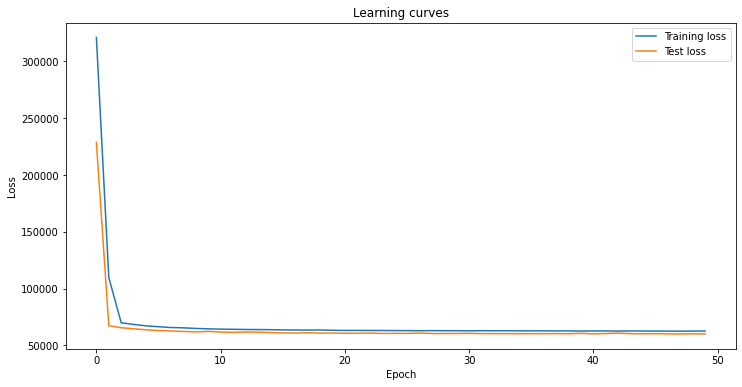

In [966]:
# Plot the learning curves

plt.rcParams["figure.figsize"] = (12, 6)
plt.plot(train_loss, label="Training loss")
plt.plot(test_loss, label="Test loss")
plt.title("Learning curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

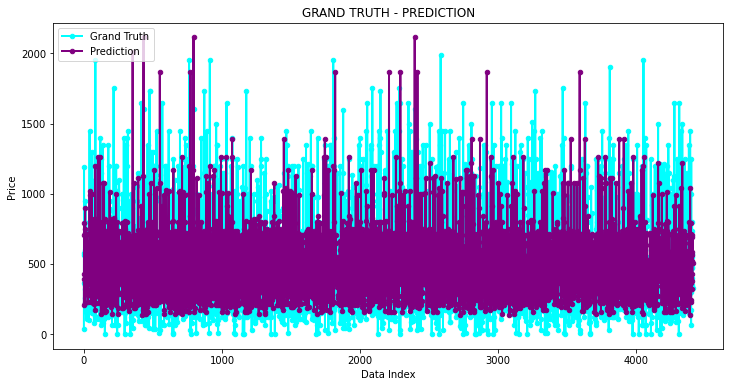

In [967]:
indexes = range(0, 4410)

# Grand Truth
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(indexes, y_test, label='Grand Truth', color='cyan', linewidth=2, marker=".",ms=9)

# Prediction
ax.plot(indexes, predictions, label='Prediction', color='purple', linewidth=2, marker=".",ms=9)

plt.title('GRAND TRUTH - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()